# **Predictive Modeling of US Road Accidents Using Meterological and Geographic Factors**

**Nitharshan Coimbatore Venkatesan**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler


from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.model_selection import GridSearchCV ,train_test_split
from sklearn.naive_bayes import GaussianNB,  MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier , plot_tree

from sklearn.linear_model import LogisticRegression

#Text Preprocessing packages
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample

# Ensure necessary NLTK data files are downloaded
#nltk.download('stopwords')
#nltk.download('wordnet')

In [2]:
df=pd.read_csv("/content/Trail_1.csv")

In [3]:
df.head(5)

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,2020-01-01,03:40:00,04:31:28,34.155567,-118.431243,0.00,At Woodman Ave - Accident.,Sherman Oaks,Los Angeles,...,False,False,False,False,False,False,False,False,False,Night
1,3,2020-01-01,01:30:18,02:14:53,27.489941,-82.470680,1.83,Exit ramp from I-75 Northbound to FL-64 lane b...,Bradenton,Manatee,...,False,False,False,False,False,False,False,False,False,Night
2,3,2020-01-01,12:26:06,13:44:36,42.733212,-73.698502,0.00,Right lane blocked due to accident on I-787 So...,Watervliet,Albany,...,False,False,False,False,False,False,False,False,False,Day
3,2,2020-01-01,19:22:35,23:22:35,45.351210,-121.973580,0.00,At E Lolo Pass Rd/NF-18 - Accident.,Welches,Clackamas,...,False,False,False,False,False,False,False,False,False,Night
4,2,2020-01-01,04:59:00,05:32:29,35.354406,-119.180925,0.00,At Westside Pkwy - Accident.,Bakersfield,Kern,...,False,False,False,False,False,False,False,True,False,Night


In [4]:
df.tail(5)

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
287947,2,2023-03-31,12:12:32,12:57:14,35.534046,-80.861693,2.103,Stationary traffic on I-77 S - US-21 S from US...,Mooresville,Iredell,...,True,False,False,False,False,False,False,False,False,Day
287948,2,2023-03-31,19:23:00,21:35:07,36.563120,-120.115571,0.312,Accident on S Trinity Ave from Trinity to W Ro...,San Joaquin,Fresno,...,False,False,False,False,False,False,False,False,False,Night
287949,2,2023-03-31,19:28:20,22:04:00,33.920233,-84.308281,2.533,Stationary traffic on GA-407 E - I-285 E from ...,Atlanta,DeKalb,...,False,False,False,False,False,False,False,False,False,Day
287950,2,2023-03-31,16:29:00,21:08:22,38.455994,-121.405267,0.005,Accident on Calvine Rd from CA-99 to Power Inn...,Sacramento,Sacramento,...,False,False,False,False,False,False,False,True,False,Day
287951,2,2023-03-31,18:27:13,21:48:49,45.296551,-93.789359,0.208,Accident on I-94 E - US-52 E from MN-25/Exit 1...,Monticello,Wright,...,False,False,False,False,False,False,False,False,False,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287952 entries, 0 to 287951
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           287952 non-null  int64  
 1   Date               287952 non-null  object 
 2   Start_Time         287952 non-null  object 
 3   End_Time           287952 non-null  object 
 4   Start_Lat          287952 non-null  float64
 5   Start_Lng          287952 non-null  float64
 6   Distance(mi)       287952 non-null  float64
 7   Description        287952 non-null  object 
 8   City               287952 non-null  object 
 9   County             287952 non-null  object 
 10  State              287952 non-null  object 
 11  Zipcode            287952 non-null  object 
 12  Timezone           287952 non-null  object 
 13  Weather_Timestamp  287952 non-null  object 
 14  Temperature(F)     287952 non-null  float64
 15  Humidity(%)        287952 non-null  float64
 16  Pr

In [6]:
df.isnull().sum()

,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,287952.000000,287952.000000,287952.000000,287952.000000,287952.000000,287952.000000,287952.000000,287952.000000,287952.000000,287952.000000
mean,2.120537,36.013865,-93.877484,0.734509,61.186892,64.648862,29.359694,9.055168,7.379504,0.005799
std,0.423256,5.213853,17.330827,1.917704,19.126084,22.834834,1.099962,2.564625,5.486858,0.043143
min,1.000000,24.574326,-124.495743,0.000000,-29.000000,1.000000,19.360000,0.000000,0.000000,0.000000
25%,2.000000,33.020824,-117.088092,0.000000,48.000000,48.000000,29.190000,10.000000,3.000000,0.000000
50%,2.000000,35.785037,-86.633633,0.140000,63.000000,67.000000,29.690000,10.000000,7.000000,0.000000
75%,2.000000,40.037324,-80.231469,0.759000,76.000000,84.000000,29.960000,10.000000,10.000000,0.000000
max,4.000000,48.999569,-67.484130,149.690000,196.000000,100.000000,30.750000,100.000000,243.000000,4.890000


In [8]:
df['Severity'].value_counts()

,count
Severity,
2,252073
3,25349
4,6630
1,3900


In [9]:
pd.set_option('display.max_rows',False)

In [10]:
df['Weather_Condition'].value_counts()

,count
Weather_Condition,
Fair,136774
Cloudy,43950
Mostly Cloudy,37569
Partly Cloudy,24946
Light Rain,13298
Light Snow,5464
Fog,4782
Rain,3261
Haze,2599


In [11]:
df[df['Weather_Condition']=='N/A Precipitation']

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
556,4,2020-01-05,04:26:47,09:11:31,40.225920,-79.609140,14.713,Closed between I-70/Exit 75 and Donegal Interc...,New Stanton,Westmoreland,...,True,False,False,False,False,False,False,False,False,Night
609,4,2020-01-05,04:56:47,09:11:31,40.225920,-79.609140,14.713,Closed between I-70/Exit 75 and Donegal Interc...,New Stanton,Westmoreland,...,True,False,False,False,False,False,False,False,False,Night
2551,2,2020-01-15,11:42:45,15:42:45,42.657720,-121.876890,0.000,At OR-422/Chiloquin Hwy/Chocktoot St - Accident.,Chiloquin,Klamath,...,False,False,False,False,False,False,False,False,False,Day
2553,2,2020-01-15,15:32:24,19:32:24,45.425390,-122.568230,0.000,At Sunnyside Rd/Exit 14 - Accident.,Clackamas,Clackamas,...,False,False,False,False,False,False,False,False,False,Day
2807,2,2020-01-16,21:49:13,22:33:46,40.881977,-76.012138,0.000,Accident on I-81 Northbound at Exit 138 PA-309.,McAdoo,Schuylkill,...,False,False,False,False,False,False,False,False,False,Night
5006,2,2020-01-29,07:10:57,08:34:09,44.346542,-87.843887,0.000,Accident on WI-96 both ways at I-43 Exit 171.,Denmark,Brown,...,False,False,False,False,False,False,False,False,False,Night
5220,2,2020-01-30,08:16:59,09:46:43,43.637615,-95.793747,0.000,Accident on I-90 Westbound at R-13 Jones Ave.,Rushmore,Nobles,...,False,False,False,False,False,False,False,False,False,Day
5660,2,2020-02-02,17:43:00,18:15:59,39.326122,-120.199853,0.000,At I-80/CA-89 - Accident.,Truckee,Nevada,...,False,False,False,False,False,False,False,False,False,Night
6767,2,2020-02-07,01:11:00,04:24:58,46.448770,-95.154800,0.000,At US-71/Jefferson St N - Accident.,Wadena,Wadena,...,False,False,False,False,False,False,False,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [12]:
#Preprocessing all the mutiple weather conditions to common categories

clear= {
        'Fair', 'Fair / Windy'
    }

    # Cloudy conditions
cloudy = {
        'Cloudy', 'Mostly Cloudy', 'Partly Cloudy',
        'Cloudy / Windy', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy'
    }

    # Rain conditions
rain = {
        'Light Rain', 'Rain', 'Heavy Rain', 'Light Drizzle', 'Drizzle',
        'Light Rain / Windy', 'Rain / Windy', 'Heavy Rain / Windy',
        'Light Drizzle / Windy', 'Drizzle / Windy', 'Heavy Drizzle',
        'Light Rain Shower', 'Light Rain Shower / Windy',
        'Showers in the Vicinity'
    }

    # Snow conditions
snow = {
        'Light Snow', 'Snow', 'Heavy Snow', 'Light Snow / Windy',
        'Snow / Windy', 'Heavy Snow / Windy', 'Blowing Snow',
        'Blowing Snow / Windy', 'Drifting Snow / Windy',
        'Light Snow Shower', 'Light Snow with Thunder'
    }

    # Mixed winter conditions
mixed_winter = {
        'Wintry Mix', 'Wintry Mix / Windy', 'Snow and Sleet',
        'Snow and Sleet / Windy', 'Light Snow and Sleet',
        'Light Snow and Sleet / Windy', 'Sleet', 'Light Sleet',
        'Heavy Sleet', 'Sleet / Windy'
    }

    # Freezing conditions
freezing = {
        'Light Freezing Rain', 'Freezing Rain', 'Light Freezing Rain / Windy',
        'Light Freezing Drizzle', 'Freezing Drizzle'
    }

    # Thunderstorm conditions
thunderstorm = {
        'T-Storm', 'Heavy T-Storm', 'Thunder', 'Thunder in the Vicinity',
        'Light Rain with Thunder', 'T-Storm / Windy',
        'Heavy T-Storm / Windy', 'Thunder / Windy',
        'Thunder / Wintry Mix', 'Thunder and Hail',
        'Snow and Thunder'
    }

    # Visibility conditions
foggy = {
        'Fog', 'Haze', 'Smoke', 'Shallow Fog', 'Haze / Windy',
        'Patches of Fog', 'Mist', 'Fog / Windy', 'Smoke / Windy',
        'Drizzle and Fog'
    }

    # Severe conditions
severe = {
        'Tornado', 'Funnel Cloud', 'Hail', 'Small Hail',
        'Squalls / Windy'
    }

    # Dust/Sand conditions
dust = {
        'Blowing Dust', 'Blowing Dust / Windy',
        'Sand / Dust Whirlwinds', 'Widespread Dust / Windy'
    }

In [13]:
def categorize_weather_condition(condition):

    if condition in clear:
        return 'Clear'
    elif condition in cloudy:
        return 'Cloudy'
    elif condition in rain:
        return 'Rain'
    elif condition in snow:
        return 'Snow'
    elif condition in mixed_winter:
        return 'Mixed Winter'
    elif condition in freezing:
        return 'Freezing'
    elif condition in thunderstorm:
        return 'Thunderstorm'
    elif condition in foggy:
        return 'Foggy'
    elif condition in severe:
        return 'Severe'
    elif condition in dust:
        return 'Dust/Sand'
    else:
        return 'Other'

def preprocess_weather_conditions_apply(df, column_name='Weather_Condition'):

    df = df.copy()
    df[column_name] = df[column_name].apply(categorize_weather_condition)
    return df


In [14]:
df_processed=preprocess_weather_conditions_apply(df)

In [15]:
df_processed['Weather_Condition'].value_counts()

,count
Weather_Condition,
Clear,138817
Cloudy,108913
Rain,19659
Foggy,8395
Snow,6941
Thunderstorm,4052
Mixed Winter,822
Other,176
Freezing,135


In [16]:
df['Wind_Direction'].value_counts()

,count
Wind_Direction,
CALM,50446
S,22736
W,20543
N,16792
E,15185
SSW,14626
WNW,14621
NW,14408
SW,13607


In [17]:
def discretize_wind_direction(direction):
    if direction in ['N', 'NNE', 'NNW','NW','NE']:
        return 'N'
    elif direction in ['S', 'SSE', 'SSW','SE','SW']:
        return 'S'
    elif direction in ['E', 'ENE', 'ESE']:
        return 'E'
    elif direction in ['W', 'WNW', 'WSW']:
        return 'W'
    elif direction == 'CALM':
        return 'Calm'
    else:
        return 'Var'

In [18]:
# Apply discretization to the 'Wind_Direction' column
df['Wind_Direction'] = df['Wind_Direction'].apply(discretize_wind_direction)

In [19]:
df['Wind_Direction'].value_counts()

,count
Wind_Direction,
S,75638
N,64366
Calm,50446
W,48425
E,35897
Var,13180


In [20]:
#df_processed dataset name
df_processed.head()

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,2020-01-01,03:40:00,04:31:28,34.155567,-118.431243,0.00,At Woodman Ave - Accident.,Sherman Oaks,Los Angeles,...,False,False,False,False,False,False,False,False,False,Night
1,3,2020-01-01,01:30:18,02:14:53,27.489941,-82.470680,1.83,Exit ramp from I-75 Northbound to FL-64 lane b...,Bradenton,Manatee,...,False,False,False,False,False,False,False,False,False,Night
2,3,2020-01-01,12:26:06,13:44:36,42.733212,-73.698502,0.00,Right lane blocked due to accident on I-787 So...,Watervliet,Albany,...,False,False,False,False,False,False,False,False,False,Day
3,2,2020-01-01,19:22:35,23:22:35,45.351210,-121.973580,0.00,At E Lolo Pass Rd/NF-18 - Accident.,Welches,Clackamas,...,False,False,False,False,False,False,False,False,False,Night
4,2,2020-01-01,04:59:00,05:32:29,35.354406,-119.180925,0.00,At Westside Pkwy - Accident.,Bakersfield,Kern,...,False,False,False,False,False,False,False,True,False,Night


## **Supervised Learning Techniques**:


1) Naive Bayes
  
  i)Gaussian Naive Bayes

In [21]:
#Gaussian Naive Bayes

X = df[['Distance(mi)','Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']]
y = df['Severity']

In [22]:
X.shape

(287952, 7)

In [23]:
#Data Before Prep
X

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0.000,46.0,56.0,29.21,10.0,0.0,0.00
1,1.830,56.0,84.0,30.02,6.0,0.0,0.00
2,0.000,39.0,50.0,29.35,10.0,13.0,0.00
3,0.000,50.0,77.0,30.02,10.0,8.0,0.00
4,0.000,40.0,93.0,29.62,5.0,0.0,0.00
5,0.000,43.0,47.0,29.41,10.0,3.0,0.00
6,1.710,52.0,88.0,29.83,3.0,0.0,0.00
7,0.000,31.0,72.0,28.47,10.0,7.0,0.00
8,0.000,48.0,37.0,29.42,10.0,12.0,0.00
...,...,...,...,...,...,...,...


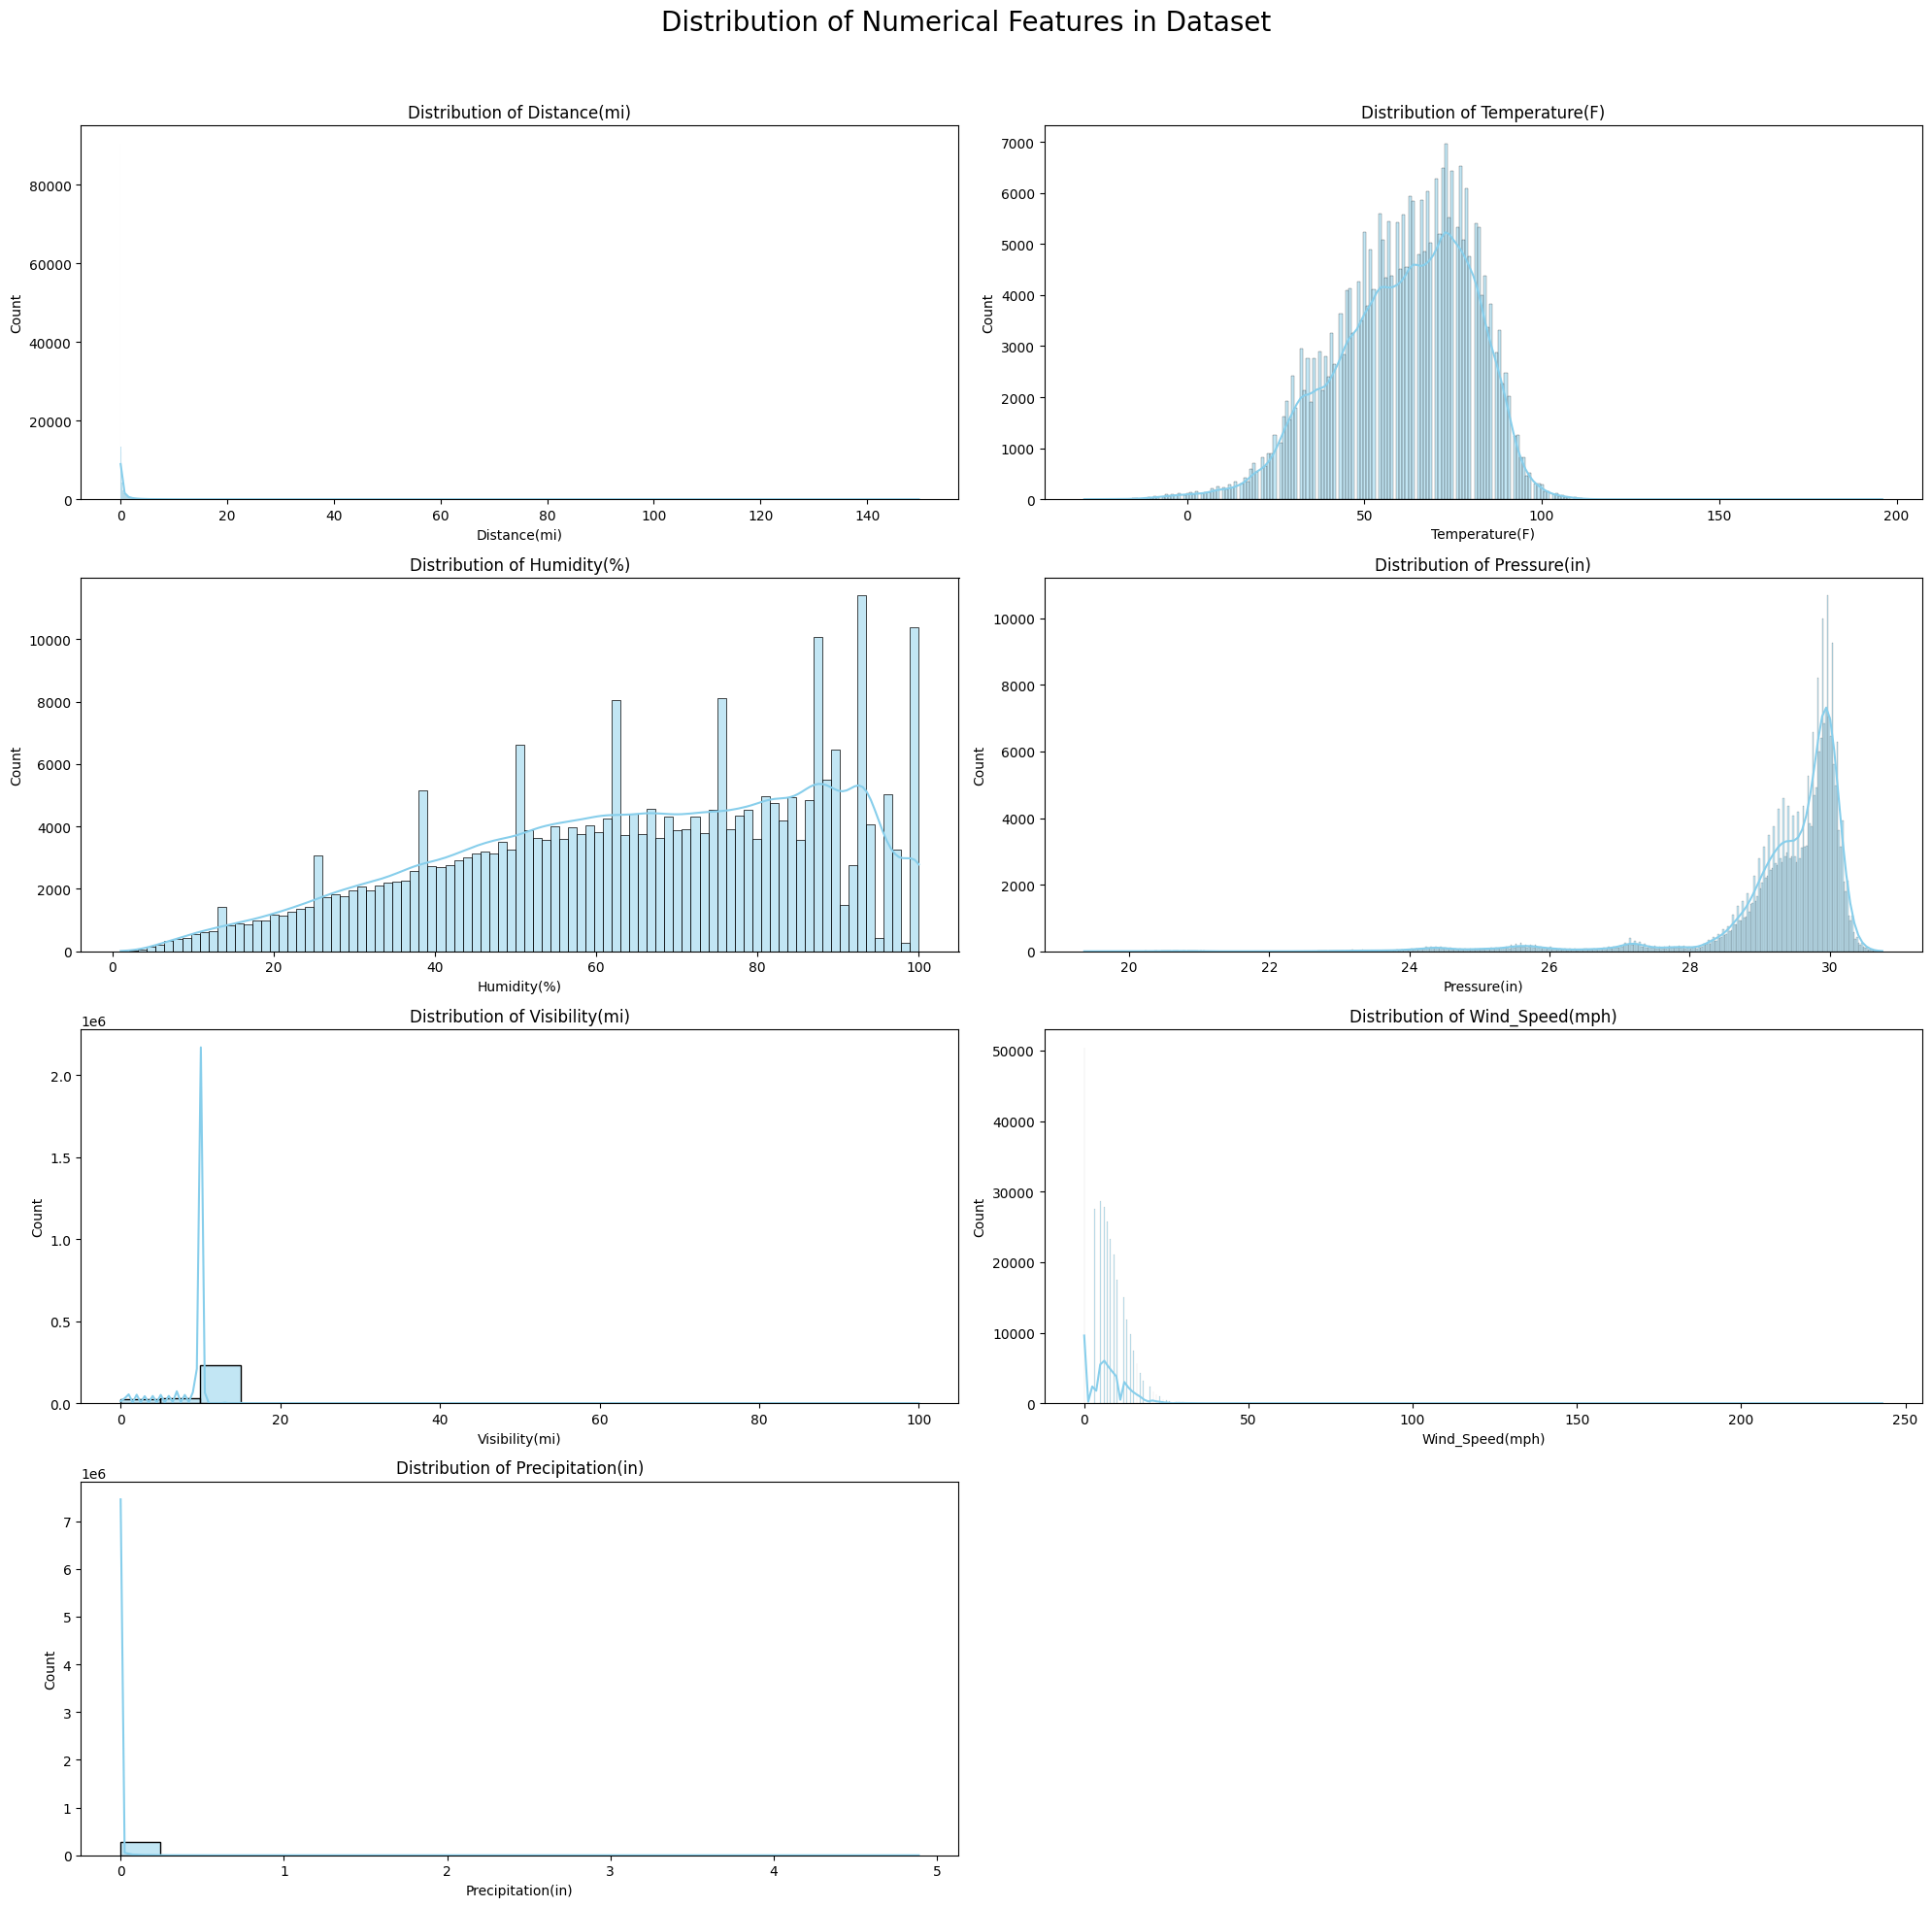

In [24]:
plt.figure(figsize=(20, 20))
plt.suptitle("Distribution of Numerical Features in Dataset", fontsize=20)

# List of numerical features to check the distribution
numerical_features = ['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
                      'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Plot histograms for each numerical feature
for i, feature in enumerate(X, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[feature], kde=True, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {feature}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Dataset has some features that arent normally distributed thus performing log transformation to make it suitable for GNB

In [25]:
X.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0.00,46.0,56.0,29.21,10.0,0.0,0.0
1,1.83,56.0,84.0,30.02,6.0,0.0,0.0
2,0.00,39.0,50.0,29.35,10.0,13.0,0.0
3,0.00,50.0,77.0,30.02,10.0,8.0,0.0
4,0.00,40.0,93.0,29.62,5.0,0.0,0.0


In [26]:
#Log Transforamtion
X['Distance(mi)'] = np.log1p(X['Distance(mi)'])
X['Visibility(mi)'] = np.log1p(X['Visibility(mi)'])
X['Wind_Speed(mph)'] = np.log1p(X['Wind_Speed(mph)'])
X['Precipitation(in)'] = np.log1p(X['Precipitation(in)'])

<ipython-input-26-c72e818c305f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Distance(mi)'] = np.log1p(X['Distance(mi)'])
<ipython-input-26-c72e818c305f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Visibility(mi)'] = np.log1p(X['Visibility(mi)'])
<ipython-input-26-c72e818c305f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [27]:
#Data after log transformation for GNB
X

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0.000000,46.0,56.0,29.21,2.397895,0.000000,0.00000
1,1.040277,56.0,84.0,30.02,1.945910,0.000000,0.00000
2,0.000000,39.0,50.0,29.35,2.397895,2.639057,0.00000
3,0.000000,50.0,77.0,30.02,2.397895,2.197225,0.00000
4,0.000000,40.0,93.0,29.62,1.791759,0.000000,0.00000
5,0.000000,43.0,47.0,29.41,2.397895,1.386294,0.00000
6,0.996949,52.0,88.0,29.83,1.386294,0.000000,0.00000
7,0.000000,31.0,72.0,28.47,2.397895,2.079442,0.00000
8,0.000000,48.0,37.0,29.42,2.397895,2.564949,0.00000
...,...,...,...,...,...,...,...


In [28]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_scaled.shape

(287952, 7)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [31]:
X_train.shape

(201566, 7)

In [32]:
# Balance the data with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [33]:
X_train_balanced.shape

(706092, 7)

In [34]:
X_train_balanced

array([[-0.72039584,  0.72221433, -0.90427186, ...,  0.3581932 ,
        -0.45393196, -0.15566405],
       [-0.72039584, -0.42804929, -1.21082159, ...,  0.3581932 ,
         0.89142601, -0.15566405],
       [-0.0052626 ,  0.35622136,  0.36571989, ...,  0.3581932 ,
         0.81184052, -0.15566405],
       ...,
       [ 1.29249883,  0.99069711,  0.44619087, ...,  0.3581932 ,
         0.68636179, -0.15566405],
       [ 0.25641886, -0.86647344, -0.28554761, ...,  0.3581932 ,
         1.09157039, -0.15566405],
       [ 1.6015559 ,  0.35994186,  1.11891423, ..., -2.7710548 ,
         0.60974932,  1.62683612]])

In [35]:
FINAL_TRAIN_GNB=pd.DataFrame(X_train_balanced,columns= [
    "Distance_mi", "Temperature_F", "Humidity_pct",
    "Pressure_in", "Visibility_mi", "Wind_Speed_mph", "Precipitation_in"
])

In [36]:
FINAL_TRAIN_GNB

,Distance_mi,Temperature_F,Humidity_pct,Pressure_in,Visibility_mi,Wind_Speed_mph,Precipitation_in
0,-0.720396,0.722214,-0.904272,0.718487,0.358193,-0.453932,-0.155664
1,-0.720396,-0.428049,-1.210822,0.709396,0.358193,0.891426,-0.155664
2,-0.005263,0.356221,0.365720,0.054826,0.358193,0.811841,-0.155664
3,-0.505271,1.140492,-1.123236,-0.217911,0.358193,0.530084,-0.155664
4,1.113228,0.094798,0.716062,0.236651,0.358193,-1.942691,-0.155664
5,0.803369,2.029332,-2.305642,-1.081579,0.358193,-0.018498,-0.155664
6,-0.078154,0.983638,-1.517371,-0.372462,0.358193,1.161316,-0.155664
7,-0.720396,-0.532619,-1.035650,0.609392,0.358193,-0.018498,-0.155664
8,-0.471878,0.983638,-0.116001,0.509388,0.358193,-0.018498,-0.155664
...,...,...,...,...,...,...,...


In [37]:
# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_balanced, y_train_balanced)

GaussianNB()

In [38]:
# Make predictions
y_pred_gnb = gnb.predict(X_test)

In [39]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} - Accuracy Score: {accuracy_score(y_test, y_pred)}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


Gaussian Naive Bayes[SMOTE Sampled] - Classification Report:
              precision    recall  f1-score   support

           1       0.02      0.86      0.04      1190
           2       0.92      0.25      0.39     75550
           3       0.16      0.14      0.15      7577
           4       0.04      0.28      0.07      2069

    accuracy                           0.25     86386
   macro avg       0.29      0.38      0.17     86386
weighted avg       0.82      0.25      0.36     86386

Gaussian Naive Bayes[SMOTE Sampled] - Accuracy Score: 0.2502836107702637


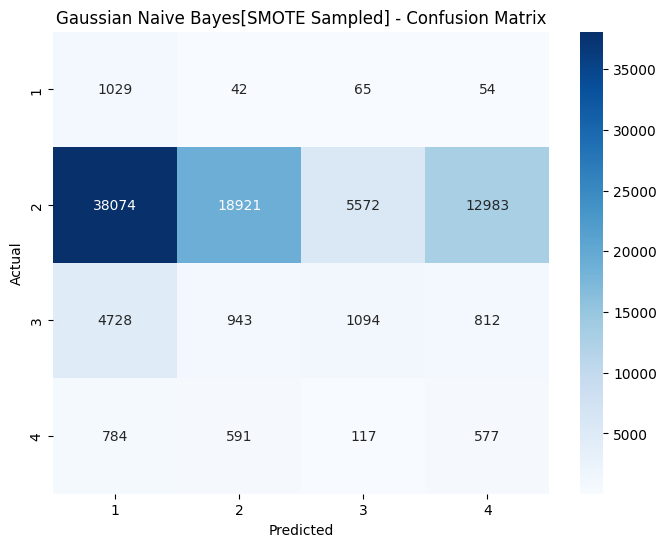

In [40]:
# Evaluate
evaluate_model(y_test, y_pred_gnb, "Gaussian Naive Bayes[SMOTE Sampled]")

In [41]:
# ADASYN (Adaptive Synthetic Sampling)
adasyn = ADASYN(random_state=42)
X_balanced, y_balanced = adasyn.fit_resample(X_train, y_train)

In [42]:
X_balanced

array([[-0.72039584,  0.72221433, -0.90427186, ...,  0.3581932 ,
        -0.45393196, -0.15566405],
       [-0.72039584, -0.42804929, -1.21082159, ...,  0.3581932 ,
         0.89142601, -0.15566405],
       [-0.0052626 ,  0.35622136,  0.36571989, ...,  0.3581932 ,
         0.81184052, -0.15566405],
       ...,
       [ 1.20289576, -0.77408203, -0.52394462, ...,  0.3581932 ,
         1.25061257, -0.15566405],
       [ 1.24202031, -0.81132381, -0.60712624, ...,  0.3581932 ,
         1.28991766, -0.15566405],
       [ 1.17620387, -0.74867462, -0.46719575, ...,  0.3581932 ,
         1.22379751, -0.15566405]])

In [43]:
gnb.fit(X_balanced, y_balanced)

GaussianNB()

In [44]:
# Make predictions
y_pred_gnb = gnb.predict(X_test)

Gaussian Naive Bayes-[ADASYN Synthetic Sampled]  - Classification Report:
              precision    recall  f1-score   support

           1       0.02      0.87      0.04      1190
           2       0.92      0.24      0.38     75550
           3       0.16      0.13      0.14      7577
           4       0.04      0.30      0.07      2069

    accuracy                           0.24     86386
   macro avg       0.29      0.38      0.16     86386
weighted avg       0.82      0.24      0.35     86386

Gaussian Naive Bayes-[ADASYN Synthetic Sampled]  - Accuracy Score: 0.24118491422221194


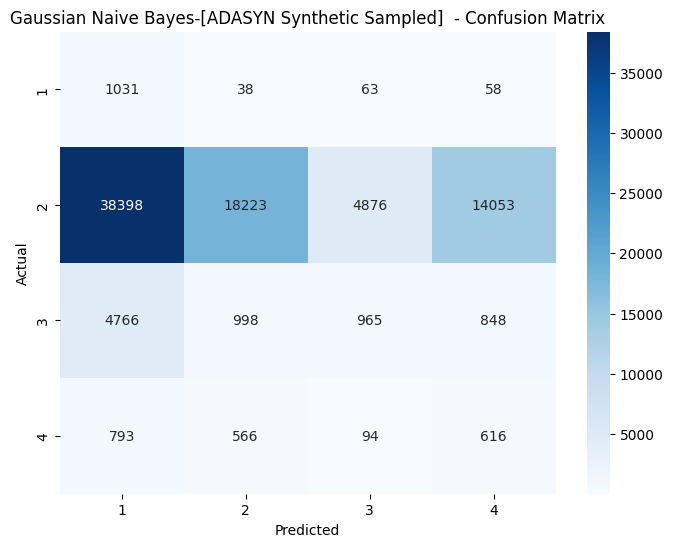

In [45]:
# Evaluate
evaluate_model(y_test, y_pred_gnb, "Gaussian Naive Bayes-[ADASYN Synthetic Sampled] ")

In [46]:
# Step 1: Downsample the dataset to balance the classes
# Separate each class into different datasets
df_1 = df[df['Severity'] == 1]
df_2 = df[df['Severity'] == 2]
df_3 = df[df['Severity'] == 3]
df_4 = df[df['Severity'] == 4]

In [47]:
# Find the minimum class size for downsampling
min_class_size = min(len(df_1), len(df_2), len(df_3), len(df_4))

# Downsample each class to the size of the smallest class
df_1_downsampled = resample(df_1, replace=False, n_samples=min_class_size, random_state=42)
df_2_downsampled = resample(df_2, replace=False, n_samples=min_class_size, random_state=42)
df_3_downsampled = resample(df_3, replace=False, n_samples=min_class_size, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=min_class_size, random_state=42)

In [48]:
# Combine the downsampled datasets
df_balanced = pd.concat([df_1_downsampled, df_2_downsampled, df_3_downsampled, df_4_downsampled])

In [49]:
# Define features and target for the downsampled dataset
X_balanced = df_balanced[numerical_features]
y_balanced = df_balanced['Severity']

In [50]:
# Apply log transformation to skewed features in the balanced dataset
X_balanced['Distance(mi)'] = np.log1p(X_balanced['Distance(mi)'])
X_balanced['Visibility(mi)'] = np.log1p(X_balanced['Visibility(mi)'])
X_balanced['Wind_Speed(mph)'] = np.log1p(X_balanced['Wind_Speed(mph)'])
X_balanced['Precipitation(in)'] = np.log1p(X_balanced['Precipitation(in)'])

<ipython-input-50-9d7a6d441e2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_balanced['Distance(mi)'] = np.log1p(X_balanced['Distance(mi)'])
<ipython-input-50-9d7a6d441e2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_balanced['Visibility(mi)'] = np.log1p(X_balanced['Visibility(mi)'])
<ipython-input-50-9d7a6d441e2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [51]:
#Standard Scaling X_balanced
scaler = StandardScaler()
X_balanced = scaler.fit_transform(X_balanced)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

In [53]:
X_train

array([[-0.55176063,  1.10100628, -1.26561434, ...,  0.33879619,
        -0.02775004, -0.15741383],
       [-0.48268033, -1.95804211, -0.24329506, ...,  0.33879619,
        -1.98181489, -0.15741383],
       [ 0.06888697, -0.13334658, -0.54147152, ...,  0.33879619,
         0.14036428, -0.15741383],
       ...,
       [ 0.57532027, -0.34801664,  0.39565449, ...,  0.09438407,
        -0.46994394, -0.15741383],
       [-0.55176063,  0.83266871,  0.99200741, ..., -2.25533933,
         0.14036428,  0.1324553 ],
       [-0.31266153, -0.13334658,  0.94941077, ...,  0.33879619,
         0.28599153, -0.15741383]])

In [54]:
FINAL_TRAIN_GNB_2=pd.DataFrame(X_train,columns= [
    "Distance_mi", "Temperature_F", "Humidity_pct",
    "Pressure_in", "Visibility_mi", "Wind_Speed_mph", "Precipitation_in"
])

In [55]:
#DATASET AFTER PERFORMING UNDERSAMPLING
FINAL_TRAIN_GNB_2

,Distance_mi,Temperature_F,Humidity_pct,Pressure_in,Visibility_mi,Wind_Speed_mph,Precipitation_in
0,-0.551761,1.101006,-1.265614,-0.259908,0.338796,-0.027750,-0.157414
1,-0.482680,-1.958042,-0.243295,-3.280693,0.338796,-1.981815,-0.157414
2,0.068887,-0.133347,-0.541472,0.493196,0.338796,0.140364,-0.157414
3,0.633287,-1.367699,1.034604,0.660552,0.338796,-1.981815,-0.157414
4,-0.551761,0.349661,-2.074950,-4.159314,2.995736,0.815479,-0.157414
5,4.027120,-0.992027,0.906814,0.518299,0.338796,1.170379,-0.157414
6,0.372537,-0.455352,1.204991,-0.050713,0.338796,0.285992,-0.157414
7,-0.551761,1.154674,-0.669261,-0.343587,0.338796,0.815479,-0.157414
8,-0.448159,-0.026012,-1.989757,-4.075636,0.338796,-1.981815,-0.157414
...,...,...,...,...,...,...,...


In [56]:
#Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred = gnb.predict(X_test)

Gaussian Naive Bayes-[Undersampled] - Classification Report:
              precision    recall  f1-score   support

           1       0.38      0.87      0.53      1170
           2       0.34      0.31      0.32      1180
           3       0.39      0.06      0.10      1186
           4       0.45      0.29      0.35      1144

    accuracy                           0.38      4680
   macro avg       0.39      0.38      0.33      4680
weighted avg       0.39      0.38      0.32      4680

Gaussian Naive Bayes-[Undersampled] - Accuracy Score: 0.3811965811965812


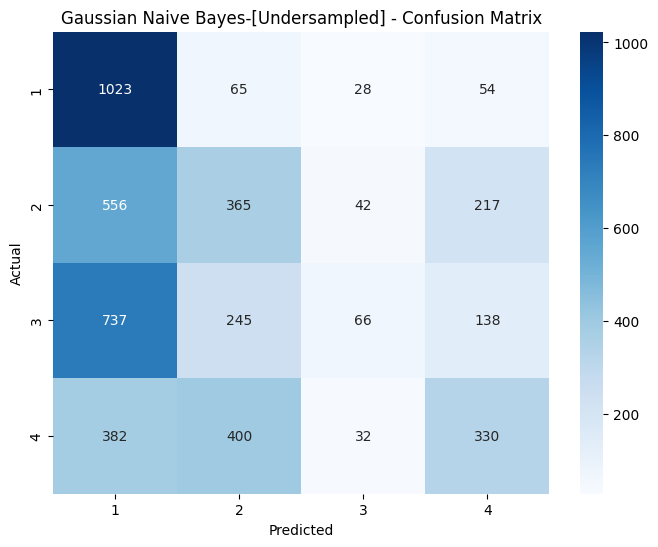

In [58]:
evaluate_model(y_test, y_pred, "Gaussian Naive Bayes-[Undersampled]")

# ii) Multinomial Naive Bayes :

Prediction of severity of road accident based on the description data of the accident

In [59]:
df[['Severity','Description']].head(10)

,Severity,Description
0,2,At Woodman Ave - Accident.
1,3,Exit ramp from I-75 Northbound to FL-64 lane b...
2,3,Right lane blocked due to accident on I-787 So...
3,2,At E Lolo Pass Rd/NF-18 - Accident.
4,2,At Westside Pkwy - Accident.
5,2,Accident on Windrock Rd at Leveland Dr.
6,3,Entry ramp to I-4 Westbound from Branch Forbes...
7,2,At RT-45/Senator Tobey Hwy - Accident.
8,2,Accident on KY-841 Gene Snyder Fwy Eastbound a...
9,2,Accident on FL-121 at 36th St.


In [60]:
# Vectorize the 'Description' column for text analysis
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

In [61]:
X_text = tfidf.fit_transform(df['Description'])
y = df['Severity']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42)

In [63]:
X_train.shape

(201566, 5000)

In [64]:
#Multinomial Naive Bayes Model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [65]:
y_pred_mnb = mnb.predict(X_test)

Multinomial Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1190
           2       0.91      0.98      0.94     75550
           3       0.73      0.38      0.50      7577
           4       0.41      0.09      0.15      2069

    accuracy                           0.90     86386
   macro avg       0.51      0.36      0.40     86386
weighted avg       0.87      0.90      0.87     86386

Multinomial Naive Bayes - Accuracy Score: 0.895828027689672


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


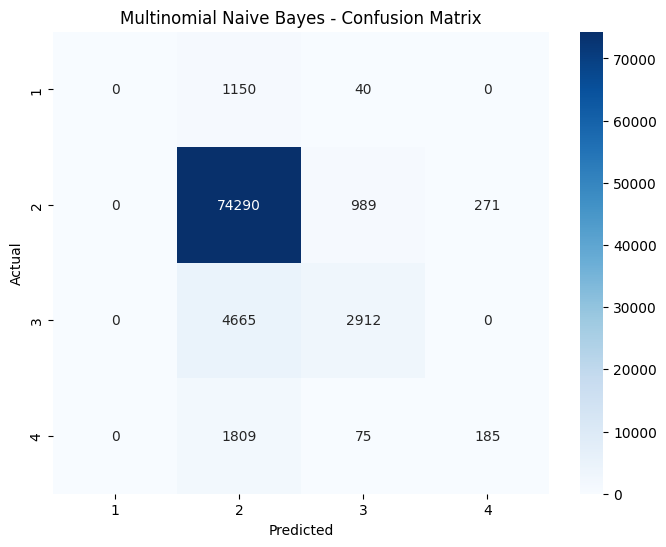

In [66]:
evaluate_model(y_test, y_pred_mnb, "Multinomial Naive Bayes")

Multinomial Naive Bayes : Wth Downsampling  and Preprocessing

In [67]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [69]:
# Apply downsampling for balancing

severity_1 = df_processed[df_processed['Severity'] == 1]
severity_2 = df_processed[df_processed['Severity'] == 2]
severity_3 = df_processed[df_processed['Severity'] == 3]
severity_4 = df_processed[df_processed['Severity'] == 4]

min_count = min(len(severity_1), len(severity_2), len(severity_3), len(severity_4))

severity_1_downsampled = resample(severity_1, replace=False, n_samples=min_count, random_state=42)
severity_2_downsampled = resample(severity_2, replace=False, n_samples=min_count, random_state=42)
severity_3_downsampled = resample(severity_3, replace=False, n_samples=min_count, random_state=42)
severity_4_downsampled = resample(severity_4, replace=False, n_samples=min_count, random_state=42)

# Combine the downsampled datasets
df_balanced = pd.concat([severity_1_downsampled, severity_2_downsampled, severity_3_downsampled, severity_4_downsampled])

df_balanced['Processed_Description'] = df_balanced['Description'].apply(preprocess_text)


In [70]:
df_balanced.head()

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Processed_Description
21762,1,2020-05-07,06:36:02,07:06:02,28.625610,-81.415030,0.000,At SR-434/Forest City Rd - Accident.,Orlando,Orange,...,False,False,False,True,False,False,True,False,Night,sr434forest city rd accident
205425,1,2022-05-02,06:35:02,07:48:52,27.269333,-82.448898,0.000,Crash on FL-72 Clark Rd at I-75 Exit 205.,Sarasota,Sarasota,...,False,False,False,False,False,False,False,False,Night,crash fl72 clark rd i75 exit 205
16080,1,2020-04-03,15:20:02,15:50:02,27.880810,-82.815190,1.223,Between SR-688/Ulmerton Rd and 113th St N - Ac...,Largo,Pinellas,...,False,False,False,False,False,False,True,False,Day,sr688ulmerton rd 113th st n accident
231304,1,2022-08-01,08:35:54,09:21:32,34.068844,-118.042313,0.000,Right hand shoulder blocked due to crash on I-...,El Monte,Los Angeles,...,False,False,False,False,False,False,False,False,Day,right hand shoulder blocked due crash i10 west...
216281,1,2022-06-07,08:57:12,09:50:06,28.443970,-81.365517,0.000,Lane blocked due to crash on CR-527 Orange Ave...,Orlando,Orange,...,False,False,False,False,False,False,False,False,Day,lane blocked due crash cr527 orange ave spruce...


In [71]:
df_balanced.shape

(15600, 37)

In [72]:
df_balanced[['Severity','Processed_Description']]

,Severity,Processed_Description
21762,1,sr434forest city rd accident
205425,1,crash fl72 clark rd i75 exit 205
16080,1,sr688ulmerton rd 113th st n accident
231304,1,right hand shoulder blocked due crash i10 west...
216281,1,lane blocked due crash cr527 orange ave spruce...
16380,1,sr54 accident
222113,1,crash pa772 market sq pa72 main st
206055,1,crash fl597 dale mabry hwy linebaugh ave
238282,1,crash fl78 bayshore rd nalle rd
...,...,...


In [73]:
X_text = tfidf.fit_transform(df_balanced['Processed_Description']).toarray()

In [74]:
X_text.shape

(15600, 5000)

In [75]:
X_text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
#USING THIS FOR MNB IN LOGISTIC REGRESSION SECTION
X_MNB_balanced=X_text.copy()

In [77]:
y_balanced = df_balanced['Severity']

In [78]:
#USING THIS FOR MNB IN LOGISTIC REGRESSION SECTION
y_MNB_balanced=y_balanced.copy()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_text, y_balanced, test_size=0.3, random_state=42)

In [80]:
#Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [81]:
y_pred_mnb = mnb.predict(X_test)

Multinomial Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78      1170
           2       0.87      0.65      0.74      1180
           3       0.71      0.92      0.80      1186
           4       0.86      0.83      0.85      1144

    accuracy                           0.79      4680
   macro avg       0.81      0.79      0.79      4680
weighted avg       0.81      0.79      0.79      4680

Multinomial Naive Bayes - Accuracy Score: 0.7931623931623931


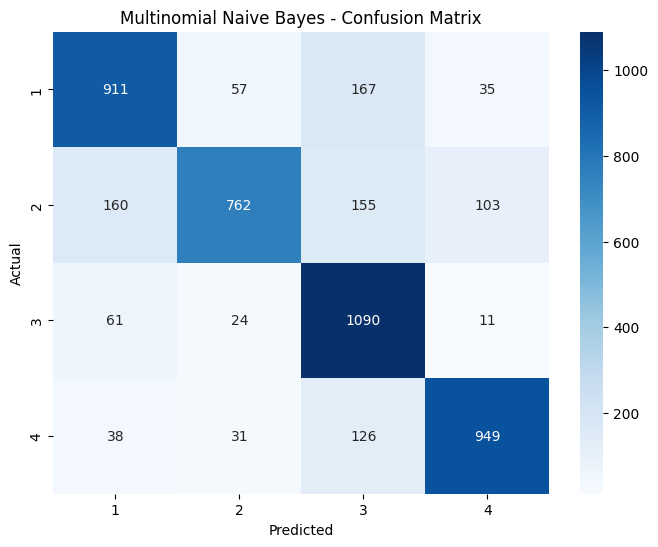

In [82]:
evaluate_model(y_test, y_pred_mnb, "Multinomial Naive Bayes")

# Bernoulli Naive Bayes :


In [83]:
# Select binary columns
X = df[['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
        'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
        'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]

In [84]:
X

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [85]:
# Encode 'Sunrise_Sunset' as binary (0 for day, 1 for night)
X['Sunrise_Sunset'] = df['Sunrise_Sunset'].apply(lambda x: 0 if x == 'Day' else 1)

<ipython-input-85-fc74deb64fa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sunrise_Sunset'] = df['Sunrise_Sunset'].apply(lambda x: 0 if x == 'Day' else 1)


In [86]:
X.head(10)

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,False,False,False,False,False,False,False,False,False,False,False,False,False,1
1,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,False,1
4,False,False,False,False,False,False,False,False,False,False,False,True,False,1
5,False,False,False,False,False,False,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,False,1
7,False,False,False,False,False,False,False,False,False,False,False,False,False,0
8,False,False,False,False,False,False,False,False,False,False,False,False,False,0
9,False,False,False,False,False,False,False,False,False,False,False,False,False,1


In [87]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
# Balance the data with SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [89]:
X_train_balanced

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,True,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,True,False,False,False,1
5,False,False,False,False,False,False,False,False,False,False,False,False,False,0
6,False,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,False,False,False,False,False,False,False,False,False,False,False,1
8,False,False,True,False,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [90]:
# Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train_balanced, y_train_balanced)

BernoulliNB()

In [91]:
y_pred_bnb = bnb.predict(X_test)

Bernoulli Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           1       0.04      0.44      0.07      1190
           2       0.93      0.04      0.07     75550
           3       0.11      0.66      0.19      7577
           4       0.03      0.37      0.06      2069

    accuracy                           0.10     86386
   macro avg       0.28      0.38      0.10     86386
weighted avg       0.83      0.10      0.08     86386

Bernoulli Naive Bayes - Accuracy Score: 0.10405621281226124


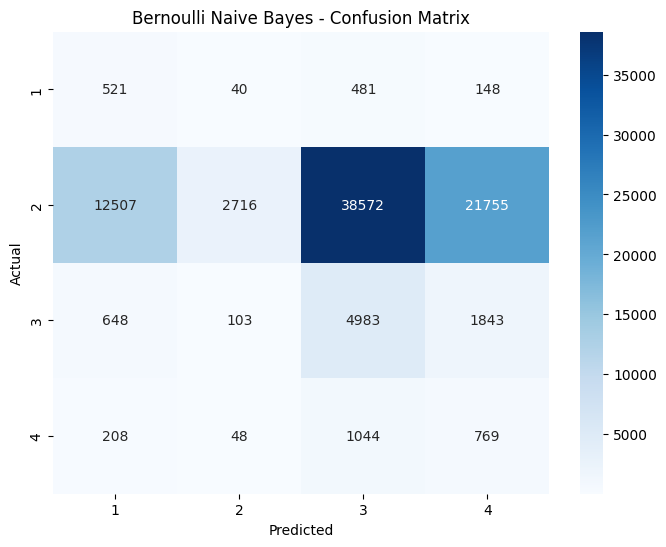

In [92]:
# Evaluate
evaluate_model(y_test, y_pred_bnb, "Bernoulli Naive Bayes")

In [93]:
#Undersampling
df_balanced.shape

(15600, 37)

In [94]:
X_balanced = df_balanced[['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                          'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                          'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]
X_balanced['Sunrise_Sunset'] = df_balanced['Sunrise_Sunset'].apply(lambda x: 0 if x == 'Day' else 1)
y_balanced = df_balanced['Severity']

<ipython-input-94-4594b4503bd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_balanced['Sunrise_Sunset'] = df_balanced['Sunrise_Sunset'].apply(lambda x: 0 if x == 'Day' else 1)


In [95]:
#Data After Undersampling and Preprocessing
X_balanced

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
21762,False,False,True,False,False,False,False,False,True,False,False,True,False,1
205425,False,False,False,False,False,False,False,False,False,False,False,False,False,1
16080,False,False,False,False,False,False,False,False,False,False,False,True,False,0
231304,False,False,False,False,False,False,False,False,False,False,False,False,False,0
216281,False,False,True,False,False,False,False,False,False,False,False,False,False,0
16380,False,False,False,False,False,False,False,False,False,False,False,False,False,1
222113,True,False,False,False,False,False,False,False,False,False,False,True,False,1
206055,False,False,False,False,False,False,False,False,True,False,False,True,False,0
238282,False,False,False,False,False,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

In [97]:
# Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [98]:
y_pred = bnb.predict(X_test)

Bernoulli Naive Bayes - Undersampled - Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.46      0.50      1170
           2       0.33      0.02      0.04      1180
           3       0.31      0.62      0.42      1186
           4       0.35      0.39      0.37      1144

    accuracy                           0.37      4680
   macro avg       0.39      0.37      0.33      4680
weighted avg       0.38      0.37      0.33      4680

Bernoulli Naive Bayes - Undersampled - Accuracy Score: 0.37243589743589745


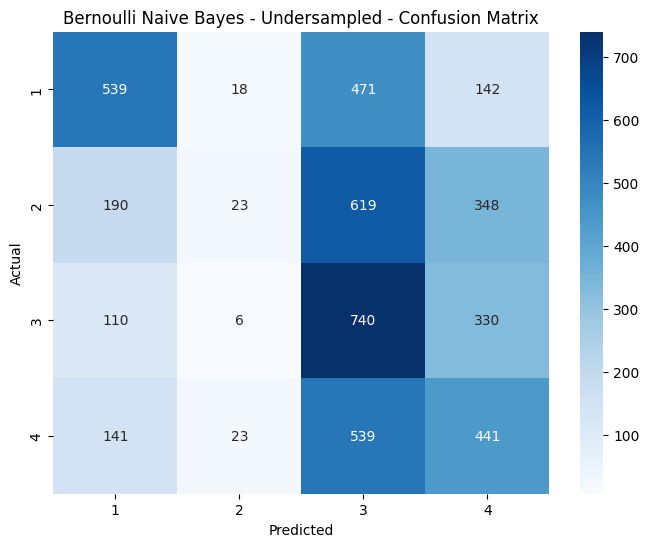

In [99]:
evaluate_model(y_test,y_pred,'Bernoulli Naive Bayes - Undersampled')

2) Decision Tree


In [100]:
DT_df=df_processed.copy()

In [101]:
#Data before Preprocessing
DT_df.head()

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,2020-01-01,03:40:00,04:31:28,34.155567,-118.431243,0.00,At Woodman Ave - Accident.,Sherman Oaks,Los Angeles,...,False,False,False,False,False,False,False,False,False,Night
1,3,2020-01-01,01:30:18,02:14:53,27.489941,-82.470680,1.83,Exit ramp from I-75 Northbound to FL-64 lane b...,Bradenton,Manatee,...,False,False,False,False,False,False,False,False,False,Night
2,3,2020-01-01,12:26:06,13:44:36,42.733212,-73.698502,0.00,Right lane blocked due to accident on I-787 So...,Watervliet,Albany,...,False,False,False,False,False,False,False,False,False,Day
3,2,2020-01-01,19:22:35,23:22:35,45.351210,-121.973580,0.00,At E Lolo Pass Rd/NF-18 - Accident.,Welches,Clackamas,...,False,False,False,False,False,False,False,False,False,Night
4,2,2020-01-01,04:59:00,05:32:29,35.354406,-119.180925,0.00,At Westside Pkwy - Accident.,Bakersfield,Kern,...,False,False,False,False,False,False,False,True,False,Night


In [102]:
#Splitting Numerical , Categorical , binary features

numerical_features = ['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
                      'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

binary_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                   'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                   'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

categorical_features = ['Weather_Condition', 'Sunrise_Sunset', 'Wind_Direction', 'State']

In [103]:
DT_df.head(10)

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,2020-01-01,03:40:00,04:31:28,34.155567,-118.431243,0.00,At Woodman Ave - Accident.,Sherman Oaks,Los Angeles,...,False,False,False,False,False,False,False,False,False,Night
1,3,2020-01-01,01:30:18,02:14:53,27.489941,-82.470680,1.83,Exit ramp from I-75 Northbound to FL-64 lane b...,Bradenton,Manatee,...,False,False,False,False,False,False,False,False,False,Night
2,3,2020-01-01,12:26:06,13:44:36,42.733212,-73.698502,0.00,Right lane blocked due to accident on I-787 So...,Watervliet,Albany,...,False,False,False,False,False,False,False,False,False,Day
3,2,2020-01-01,19:22:35,23:22:35,45.351210,-121.973580,0.00,At E Lolo Pass Rd/NF-18 - Accident.,Welches,Clackamas,...,False,False,False,False,False,False,False,False,False,Night
4,2,2020-01-01,04:59:00,05:32:29,35.354406,-119.180925,0.00,At Westside Pkwy - Accident.,Bakersfield,Kern,...,False,False,False,False,False,False,False,True,False,Night
5,2,2020-01-01,00:52:44,02:58:53,32.993809,-96.792542,0.00,Accident on Windrock Rd at Leveland Dr.,Dallas,Collin,...,False,False,False,False,False,False,False,False,False,Night
6,3,2020-01-01,01:29:37,02:58:17,28.027390,-82.189957,1.71,Entry ramp to I-4 Westbound from Branch Forbes...,Plant City,Hillsborough,...,False,False,False,False,False,False,False,False,False,Night
7,2,2020-01-01,10:49:17,15:25:16,42.865310,-71.945720,0.00,At RT-45/Senator Tobey Hwy - Accident.,Peterborough,Hillsborough,...,False,False,False,False,False,False,False,False,False,Day
8,2,2020-01-01,12:49:35,13:52:22,38.119999,-85.777161,0.00,Accident on KY-841 Gene Snyder Fwy Eastbound a...,Fairdale,Jefferson,...,False,False,False,False,False,False,False,False,False,Day
9,2,2020-01-01,05:52:31,08:13:02,29.930010,-82.423592,0.00,Accident on FL-121 at 36th St.,Lake Butler,Union,...,False,False,False,False,False,False,False,False,False,Night


In [104]:
# Log transformation for skewed numerical features
DT_df['Distance(mi)'] = np.log1p(DT_df['Distance(mi)'])
DT_df['Visibility(mi)'] = np.log1p(DT_df['Visibility(mi)'])
DT_df['Wind_Speed(mph)'] = np.log1p(DT_df['Wind_Speed(mph)'])
DT_df['Precipitation(in)'] = np.log1p(DT_df['Precipitation(in)'])

In [105]:
#Encode categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    DT_df[col] = le.fit_transform(DT_df[col])
    label_encoders[col] = le

In [106]:
# Combine all features
X = DT_df[numerical_features + binary_features + categorical_features]
y = DT_df['Severity']

In [107]:
#Data After Preprocessing
X.head(10)

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Weather_Condition,Sunrise_Sunset,Wind_Direction,State
0,0.000000,46.0,56.0,29.21,2.397895,0.000000,0.0,False,False,False,...,False,False,False,False,False,False,1,1,0,3
1,1.040277,56.0,84.0,30.02,1.945910,0.000000,0.0,False,False,False,...,False,False,False,False,False,False,3,1,0,8
2,0.000000,39.0,50.0,29.35,2.397895,2.639057,0.0,False,False,False,...,False,False,False,False,False,False,1,0,15,32
3,0.000000,50.0,77.0,30.02,2.397895,2.197225,0.0,False,False,False,...,False,False,False,False,False,False,1,1,17,35
4,0.000000,40.0,93.0,29.62,1.791759,0.000000,0.0,False,False,False,...,False,False,False,False,True,False,0,1,0,3
5,0.000000,43.0,47.0,29.41,2.397895,1.386294,0.0,False,False,False,...,False,False,False,False,False,False,0,1,9,41
6,0.996949,52.0,88.0,29.83,1.386294,0.000000,0.0,False,False,False,...,False,False,False,False,False,False,0,1,0,8
7,0.000000,31.0,72.0,28.47,2.397895,2.079442,0.0,False,False,False,...,False,False,False,False,False,False,1,0,17,28
8,0.000000,48.0,37.0,29.42,2.397895,2.564949,0.0,False,False,False,...,False,False,False,False,False,False,0,0,13,15
9,0.000000,36.0,100.0,29.99,1.609438,0.000000,0.0,False,False,False,...,False,False,False,False,False,False,0,1,0,8


In [108]:
#Perform Smote to balance the Dataset
X_balanced, y_balanced = smote.fit_resample(X, y)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)


In [110]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
y_pred_dt = dt.predict(X_test)

In [112]:
y_pred_dt

array([3, 1, 4, ..., 3, 2, 2])

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96     75288
           2       0.83      0.78      0.81     75873
           3       0.83      0.84      0.84     75875
           4       0.89      0.92      0.91     75452

    accuracy                           0.88    302488
   macro avg       0.88      0.88      0.88    302488
weighted avg       0.88      0.88      0.88    302488

Decision Tree - Accuracy Score: 0.8766893232128217


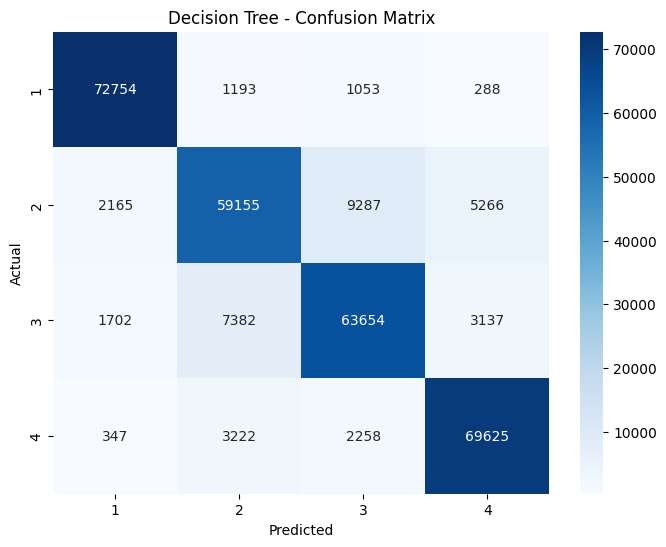

In [113]:
evaluate_model(y_test, y_pred_dt, "Decision Tree")

While executiing Decision Tree with the smote sampled dataset we are able to observer that the accuracy of the decision tree model resulted to 87%.

In [114]:
X

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Weather_Condition,Sunrise_Sunset,Wind_Direction,State
0,0.000000,46.0,56.0,29.21,2.397895,0.000000,0.00000,False,False,False,...,False,False,False,False,False,False,1,1,0,3
1,1.040277,56.0,84.0,30.02,1.945910,0.000000,0.00000,False,False,False,...,False,False,False,False,False,False,3,1,0,8
2,0.000000,39.0,50.0,29.35,2.397895,2.639057,0.00000,False,False,False,...,False,False,False,False,False,False,1,0,15,32
3,0.000000,50.0,77.0,30.02,2.397895,2.197225,0.00000,False,False,False,...,False,False,False,False,False,False,1,1,17,35
4,0.000000,40.0,93.0,29.62,1.791759,0.000000,0.00000,False,False,False,...,False,False,False,False,True,False,0,1,0,3
5,0.000000,43.0,47.0,29.41,2.397895,1.386294,0.00000,False,False,False,...,False,False,False,False,False,False,0,1,9,41
6,0.996949,52.0,88.0,29.83,1.386294,0.000000,0.00000,False,False,False,...,False,False,False,False,False,False,0,1,0,8
7,0.000000,31.0,72.0,28.47,2.397895,2.079442,0.00000,False,False,False,...,False,False,False,False,False,False,1,0,17,28
8,0.000000,48.0,37.0,29.42,2.397895,2.564949,0.00000,False,False,False,...,False,False,False,False,False,False,0,0,13,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Performing Undersampling for the dataset instead of SMOTE

In [115]:
#Undersampling
UDT=DT_df[['Severity']+numerical_features + binary_features + categorical_features]

In [116]:
UDT

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Weather_Condition,Sunrise_Sunset,Wind_Direction,State
0,2,0.000000,46.0,56.0,29.21,2.397895,0.000000,0.00000,False,False,...,False,False,False,False,False,False,1,1,0,3
1,3,1.040277,56.0,84.0,30.02,1.945910,0.000000,0.00000,False,False,...,False,False,False,False,False,False,3,1,0,8
2,3,0.000000,39.0,50.0,29.35,2.397895,2.639057,0.00000,False,False,...,False,False,False,False,False,False,1,0,15,32
3,2,0.000000,50.0,77.0,30.02,2.397895,2.197225,0.00000,False,False,...,False,False,False,False,False,False,1,1,17,35
4,2,0.000000,40.0,93.0,29.62,1.791759,0.000000,0.00000,False,False,...,False,False,False,False,True,False,0,1,0,3
5,2,0.000000,43.0,47.0,29.41,2.397895,1.386294,0.00000,False,False,...,False,False,False,False,False,False,0,1,9,41
6,3,0.996949,52.0,88.0,29.83,1.386294,0.000000,0.00000,False,False,...,False,False,False,False,False,False,0,1,0,8
7,2,0.000000,31.0,72.0,28.47,2.397895,2.079442,0.00000,False,False,...,False,False,False,False,False,False,1,0,17,28
8,2,0.000000,48.0,37.0,29.42,2.397895,2.564949,0.00000,False,False,...,False,False,False,False,False,False,0,0,13,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [117]:
df_1 = UDT[UDT['Severity'] == 1]
df_2 = UDT[UDT['Severity'] == 2]
df_3 = UDT[UDT['Severity'] == 3]
df_4 = UDT[UDT['Severity'] == 4]

In [118]:
min_class_size = min(len(df_1), len(df_2), len(df_3), len(df_4))

In [119]:
df_1_resampled = resample(df_1, replace=False, n_samples=min_class_size, random_state=42)
df_2_resampled = resample(df_2, replace=False, n_samples=min_class_size, random_state=42)
df_3_resampled = resample(df_3, replace=False, n_samples=min_class_size, random_state=42)
df_4_resampled = resample(df_4, replace=False, n_samples=min_class_size, random_state=42)

In [120]:
# Combine balanced classes
df_balanced = pd.concat([df_1_resampled, df_2_resampled, df_3_resampled, df_4_resampled])
X_balanced = df_balanced[numerical_features + binary_features + categorical_features]
y_balanced = df_balanced['Severity']

In [121]:
X_balanced

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Weather_Condition,Sunrise_Sunset,Wind_Direction,State
21762,0.000000,65.0,48.0,29.90,2.397895,2.564949,0.000000,False,False,True,...,False,True,False,False,True,False,0,1,4,8
205425,0.000000,68.0,93.0,30.03,2.397895,1.791759,0.000000,False,False,False,...,False,False,False,False,False,False,0,1,1,8
16080,0.798858,84.0,27.0,29.95,2.397895,1.945910,0.000000,False,False,False,...,False,False,False,False,True,False,0,0,4,8
231304,0.000000,77.0,62.0,29.90,2.397895,0.000000,0.000000,False,False,False,...,False,False,False,False,False,False,1,0,0,3
216281,0.000000,78.0,79.0,29.88,2.397895,0.000000,0.000000,False,False,True,...,False,False,False,False,False,False,0,0,0,8
16380,0.000000,63.0,100.0,29.91,2.397895,0.000000,0.000000,False,False,False,...,False,False,False,False,False,False,1,1,0,8
222113,0.000000,60.0,83.0,29.79,2.397895,0.000000,0.000000,True,False,False,...,False,False,False,False,True,False,0,1,0,36
206055,0.000000,78.0,71.0,30.05,2.397895,2.197225,0.000000,False,False,False,...,False,True,False,False,True,False,1,0,3,8
238282,0.000000,77.0,94.0,29.97,2.397895,1.791759,0.000000,False,False,False,...,False,False,False,False,True,False,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [122]:
# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

Implementing Grid Search CV for hyper parameter Tuning and genrating Three trees

In [123]:
# Perform Grid Search CV for hyperparameter tuning
# Removing Max Depth parameter for visualization purpose
param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 0.5, 0.8, int(len(X_train.columns) * 0.5)],
    'criterion': ['gini', 'entropy']
}

In [124]:
# Decision Tree model
dt = DecisionTreeClassifier(max_depth=3)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [125]:
# Fit Grid Search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [None, 0.5, 0.8, 12],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Best Estimators

In [126]:
# Get the best estimator
best_dt = grid_search.best_estimator_

In [127]:
# Resample the balanced data for Tree 1
X_train_sampled_1, _, y_train_sampled_1, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=101)

# Train the best model from grid search on the resampled data
best_dt.fit(X_train_sampled_1, y_train_sampled_1)

DecisionTreeClassifier(max_depth=3, max_features=0.8, min_samples_split=5)

In [128]:
y_pred1=best_dt.predict(X_test)

Decision Tree 1 - Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.38      0.51      1170
           2       0.58      0.34      0.43      1180
           3       0.51      0.79      0.62      1186
           4       0.56      0.78      0.65      1144

    accuracy                           0.57      4680
   macro avg       0.61      0.57      0.56      4680
weighted avg       0.61      0.57      0.55      4680

Decision Tree 1 - Accuracy Score: 0.5726495726495726


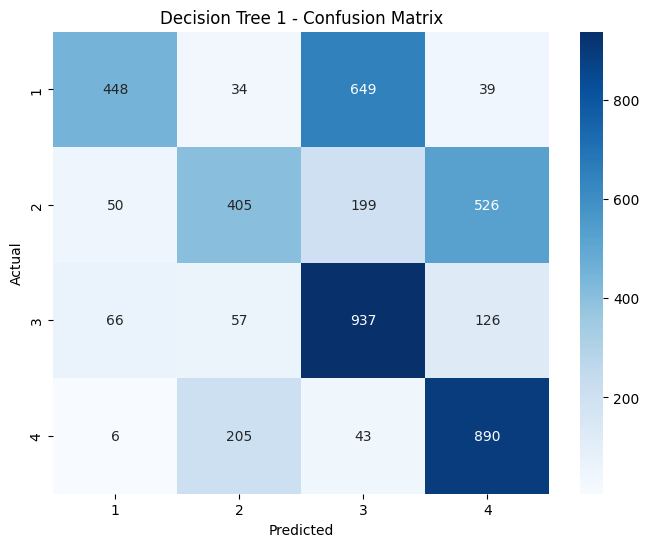

In [129]:
evaluate_model(y_test,y_pred1,"Decision Tree 1")

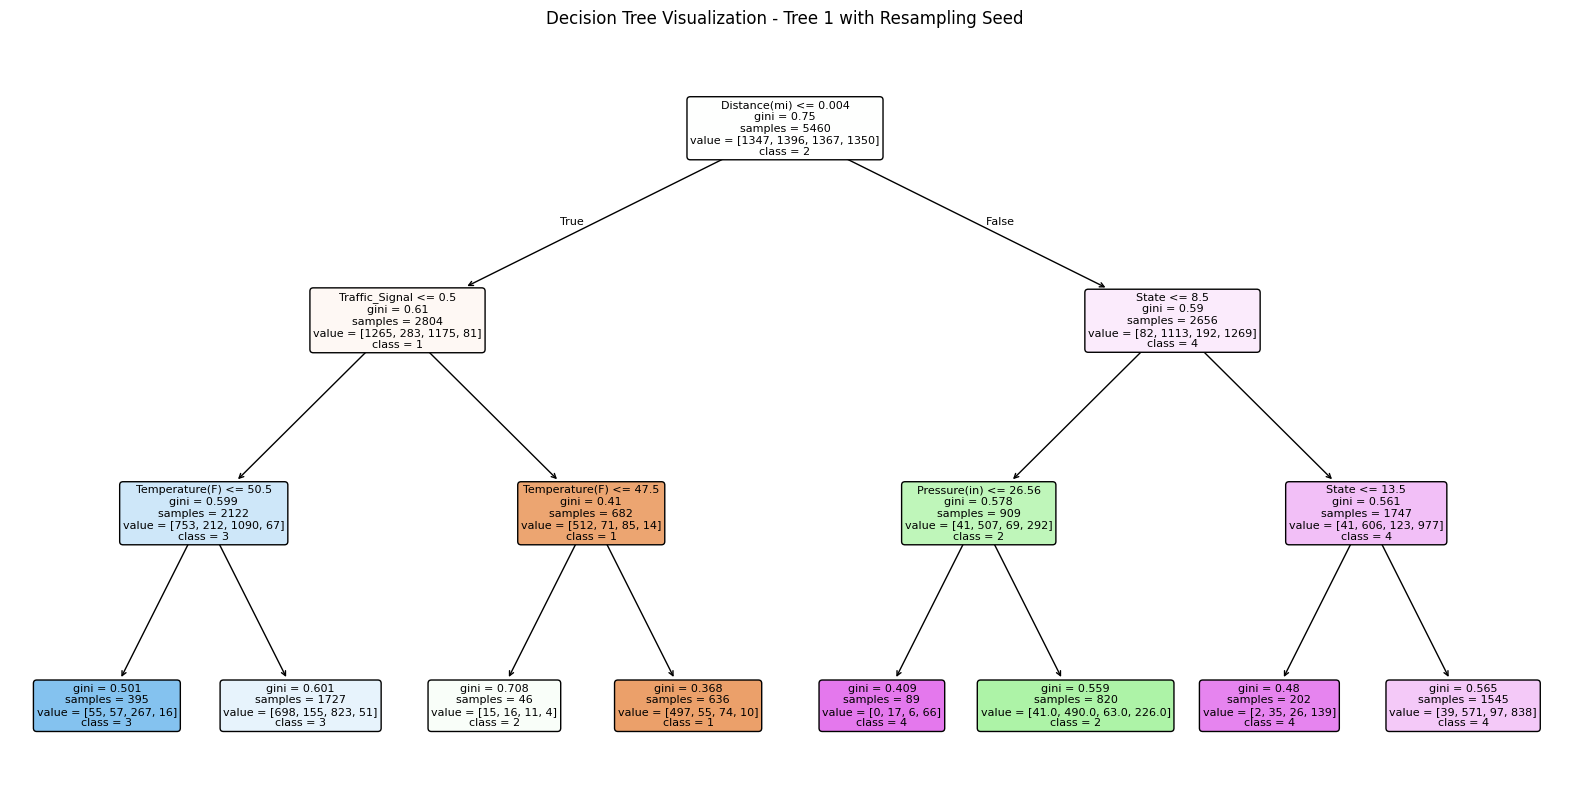

In [130]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X_balanced.columns, class_names=[str(cls) for cls in sorted(y_balanced.unique())], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization - Tree 1 with Resampling Seed")
plt.show()

In [131]:
# Resample the balanced data for Tree 2
X_train_sampled_2, _, y_train_sampled_2, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=102)

# Train the best model from grid search on the resampled data
best_dt.fit(X_train_sampled_2, y_train_sampled_2)

DecisionTreeClassifier(max_depth=3, max_features=0.8, min_samples_split=5)

In [132]:
y_pred2=best_dt.predict(X_test)

Decision Tree 2 - Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.39      0.52      1170
           2       0.50      0.26      0.34      1180
           3       0.51      0.79      0.62      1186
           4       0.53      0.77      0.63      1144

    accuracy                           0.55      4680
   macro avg       0.58      0.55      0.53      4680
weighted avg       0.58      0.55      0.53      4680

Decision Tree 2 - Accuracy Score: 0.55


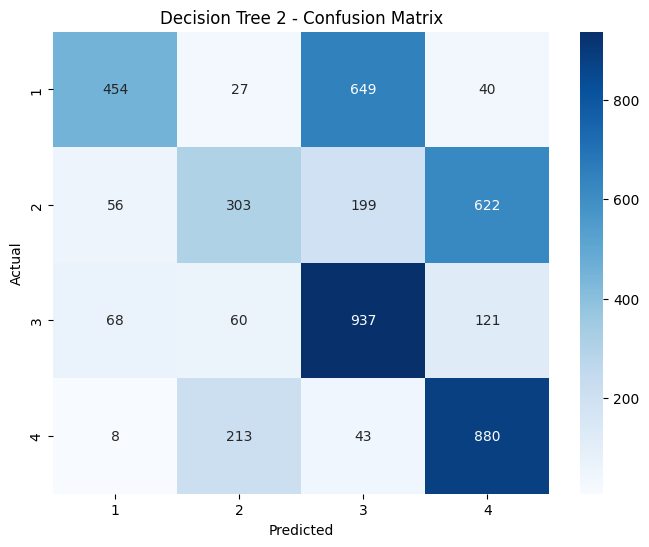

In [133]:
evaluate_model(y_test,y_pred2,"Decision Tree 2")

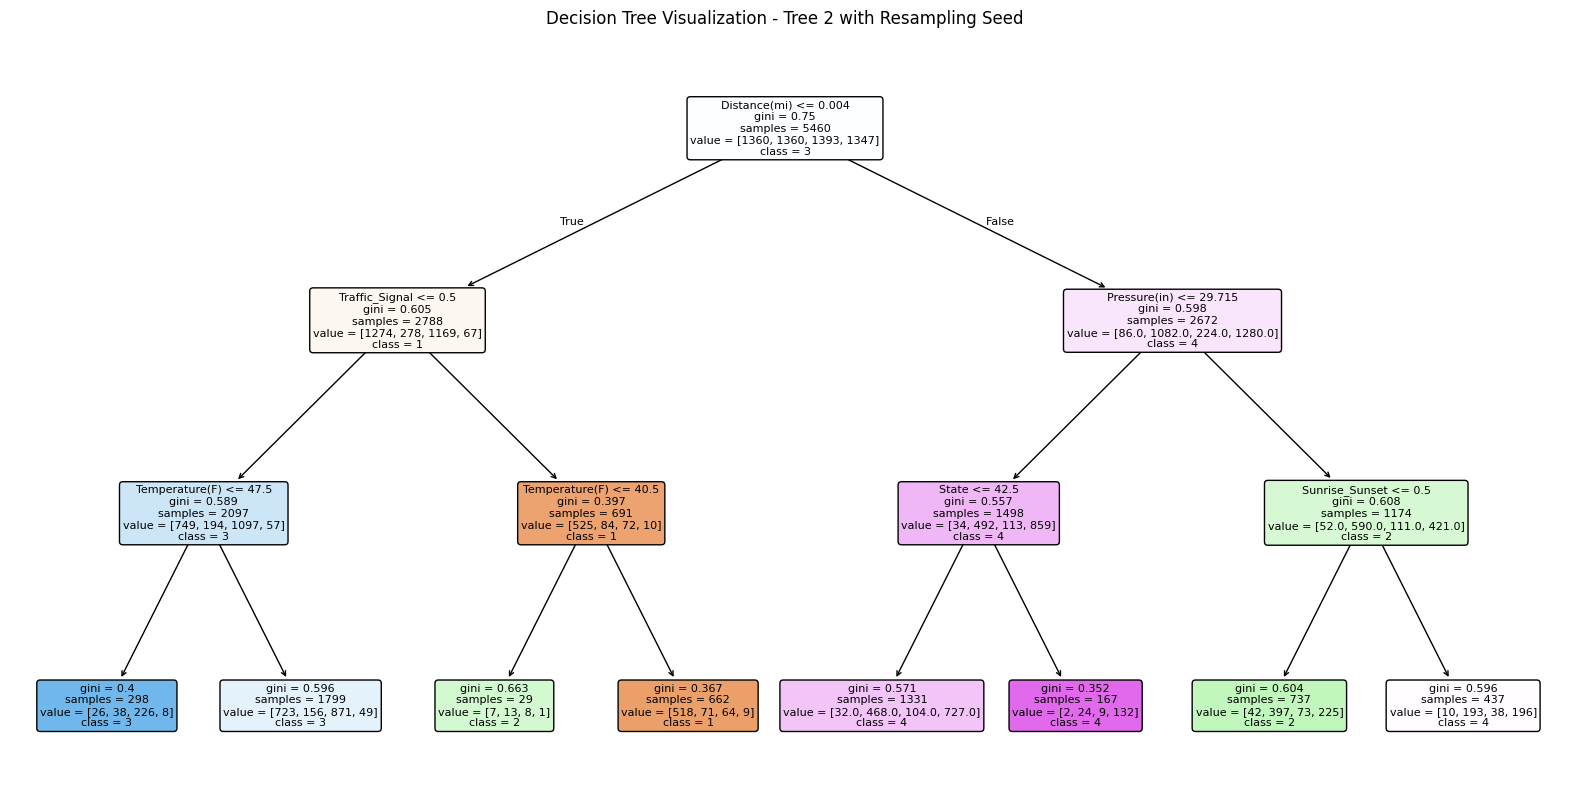

In [134]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X_balanced.columns, class_names=[str(cls) for cls in sorted(y_balanced.unique())], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization - Tree 2 with Resampling Seed")
plt.show()

In [135]:
dt = DecisionTreeClassifier(max_depth=5)  # Using max_depth=3 for simpler tree visualization
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [136]:
# Predictions and Evaluation for Tree 3
y_pred_4 = dt.predict(X_test)

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.45      0.57      1170
           2       0.60      0.39      0.48      1180
           3       0.54      0.78      0.63      1186
           4       0.58      0.76      0.66      1144

    accuracy                           0.60      4680
   macro avg       0.62      0.60      0.58      4680
weighted avg       0.62      0.60      0.58      4680

Decision Tree - Accuracy Score: 0.5950854700854701


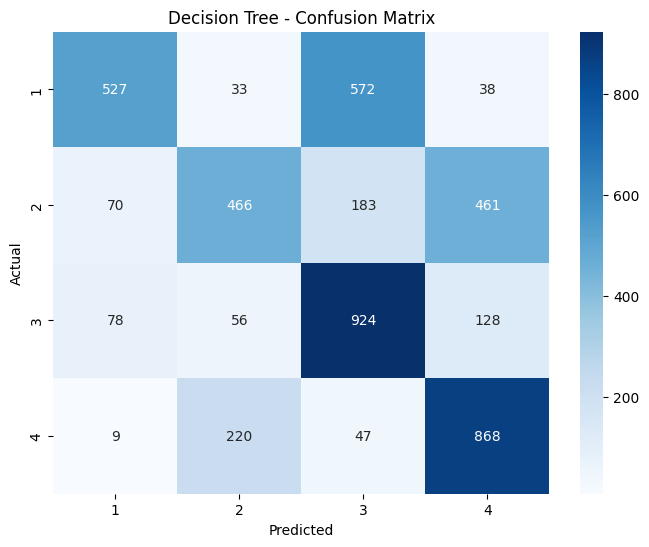

In [137]:
evaluate_model(y_test, y_pred_4, "Decision Tree")

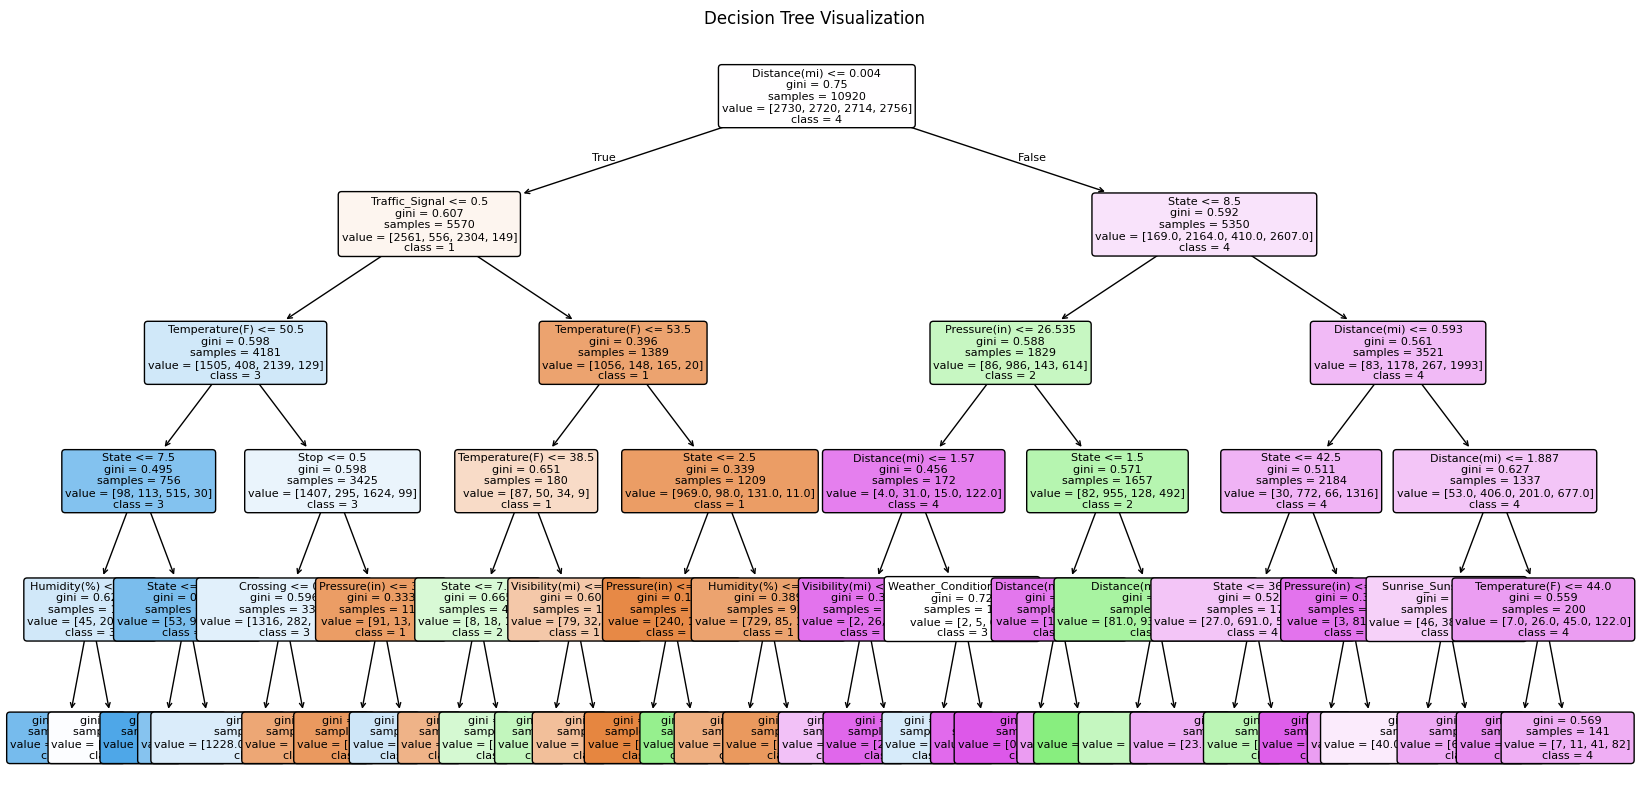

In [138]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_balanced.columns, class_names=[str(cls) for cls in sorted(y_balanced.unique())], filled=True, rounded=True, fontsize=8)
plt.title(f"Decision Tree Visualization ")
plt.show()

As far from the observations made , by increasing the max_depth and max_features values we see difference in the prediction accuracy for the visualization aspect , grpahs with max_depth 3 has been showed in plot 1 and plot 2 , with hyper parameter tuning

Plot 3 shows increase in accuracy due to increase in max depth thus , it has a conjusted output grpah but with better accuracy.

As a conclusion we could say that , sampling method plays a majore role and also the parameter tuning helps in showing accuracy variation , if we increase the max depth too much it would eventually result in node formation for each oberservation which would result in overfitting, thus accuracy would be higher than what is acctully reachable.

While Implementing SMOTE to balance the data we find accuracy to be 87% whereas comparing it with Undersampling and maintaing the paramters we are able to get a max accuracy of 60% for multiclass classification of severity of road accident.

3) Regression

  i) Logistic Regression

  ii)Multinomial Naive Bayes

In [139]:
df_processed

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,2020-01-01,03:40:00,04:31:28,34.155567,-118.431243,0.000,At Woodman Ave - Accident.,Sherman Oaks,Los Angeles,...,False,False,False,False,False,False,False,False,False,Night
1,3,2020-01-01,01:30:18,02:14:53,27.489941,-82.470680,1.830,Exit ramp from I-75 Northbound to FL-64 lane b...,Bradenton,Manatee,...,False,False,False,False,False,False,False,False,False,Night
2,3,2020-01-01,12:26:06,13:44:36,42.733212,-73.698502,0.000,Right lane blocked due to accident on I-787 So...,Watervliet,Albany,...,False,False,False,False,False,False,False,False,False,Day
3,2,2020-01-01,19:22:35,23:22:35,45.351210,-121.973580,0.000,At E Lolo Pass Rd/NF-18 - Accident.,Welches,Clackamas,...,False,False,False,False,False,False,False,False,False,Night
4,2,2020-01-01,04:59:00,05:32:29,35.354406,-119.180925,0.000,At Westside Pkwy - Accident.,Bakersfield,Kern,...,False,False,False,False,False,False,False,True,False,Night
5,2,2020-01-01,00:52:44,02:58:53,32.993809,-96.792542,0.000,Accident on Windrock Rd at Leveland Dr.,Dallas,Collin,...,False,False,False,False,False,False,False,False,False,Night
6,3,2020-01-01,01:29:37,02:58:17,28.027390,-82.189957,1.710,Entry ramp to I-4 Westbound from Branch Forbes...,Plant City,Hillsborough,...,False,False,False,False,False,False,False,False,False,Night
7,2,2020-01-01,10:49:17,15:25:16,42.865310,-71.945720,0.000,At RT-45/Senator Tobey Hwy - Accident.,Peterborough,Hillsborough,...,False,False,False,False,False,False,False,False,False,Day
8,2,2020-01-01,12:49:35,13:52:22,38.119999,-85.777161,0.000,Accident on KY-841 Gene Snyder Fwy Eastbound a...,Fairdale,Jefferson,...,False,False,False,False,False,False,False,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [140]:
df_processed[['Start_Time','End_Time']].head(10)

,Start_Time,End_Time
0,03:40:00,04:31:28
1,01:30:18,02:14:53
2,12:26:06,13:44:36
3,19:22:35,23:22:35
4,04:59:00,05:32:29
5,00:52:44,02:58:53
6,01:29:37,02:58:17
7,10:49:17,15:25:16
8,12:49:35,13:52:22
9,05:52:31,08:13:02


In [141]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287952 entries, 0 to 287951
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           287952 non-null  int64  
 1   Date               287952 non-null  object 
 2   Start_Time         287952 non-null  object 
 3   End_Time           287952 non-null  object 
 4   Start_Lat          287952 non-null  float64
 5   Start_Lng          287952 non-null  float64
 6   Distance(mi)       287952 non-null  float64
 7   Description        287952 non-null  object 
 8   City               287952 non-null  object 
 9   County             287952 non-null  object 
 10  State              287952 non-null  object 
 11  Zipcode            287952 non-null  object 
 12  Timezone           287952 non-null  object 
 13  Weather_Timestamp  287952 non-null  object 
 14  Temperature(F)     287952 non-null  float64
 15  Humidity(%)        287952 non-null  float64
 16  Pr

In [142]:
# Convert 'Start_Time' and 'End_Time' to datetime format, in case they are not already
df_processed['Start_Time'] = pd.to_datetime(df_processed['Start_Time'], errors='coerce')
df_processed['End_Time'] = pd.to_datetime(df_processed['End_Time'], errors='coerce')

<ipython-input-142-f7ca8f667fda>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_processed['Start_Time'] = pd.to_datetime(df_processed['Start_Time'], errors='coerce')
<ipython-input-142-f7ca8f667fda>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_processed['End_Time'] = pd.to_datetime(df_processed['End_Time'], errors='coerce')


In [143]:
# Calculate the duration between 'Start_Time' and 'End_Time' directly
# Since they are already in datetime format, we subtract and convert to minutes
df_processed['Accident_Duration'] = (df_processed['End_Time'] - df_processed['Start_Time']).dt.total_seconds() / 60

In [144]:
# Display the first few rows to verify the new feature 'Accident_Duration'
df_processed[['Start_Time', 'End_Time', 'Accident_Duration']].head()

,Start_Time,End_Time,Accident_Duration
0,2024-11-14 03:40:00,2024-11-14 04:31:28,51.466667
1,2024-11-14 01:30:18,2024-11-14 02:14:53,44.583333
2,2024-11-14 12:26:06,2024-11-14 13:44:36,78.500000
3,2024-11-14 19:22:35,2024-11-14 23:22:35,240.000000
4,2024-11-14 04:59:00,2024-11-14 05:32:29,33.483333


In [145]:
df_processed['Accident_Duration'].isnull().sum()

0

In [146]:
# Check for any negative values in the 'Accident_Duration' column
negative_durations = df_processed[df_processed['Accident_Duration'] < 0]

# Display rows with negative accident durations, if any
negative_durations[['Start_Time', 'End_Time', 'Accident_Duration']]


,Start_Time,End_Time,Accident_Duration
38,2024-11-14 21:18:04,2024-11-14 01:18:04,-1200.000000
61,2024-11-14 23:35:34,2024-11-14 00:05:07,-1410.450000
74,2024-11-14 23:28:00,2024-11-14 00:00:29,-1407.516667
304,2024-11-14 23:39:00,2024-11-14 00:31:27,-1387.550000
328,2024-11-14 21:38:38,2024-11-14 01:38:38,-1200.000000
372,2024-11-14 19:29:02,2024-11-14 00:22:59,-1146.050000
446,2024-11-14 23:09:00,2024-11-14 00:23:26,-1365.566667
548,2024-11-14 22:50:44,2024-11-14 00:42:40,-1328.066667
572,2024-11-14 23:59:48,2024-11-14 00:27:56,-1411.866667
...,...,...,...


In [147]:
# Correct the 'End_Time' by adding 1 day to rows where 'Accident_Duration' is negative
df_processed.loc[df_processed['Accident_Duration'] < 0, 'End_Time'] += pd.Timedelta(days=1)

In [148]:
# Recalculate 'Accident_Duration' after adjusting the 'End_Time'
df_processed['Accident_Duration'] = (df_processed['End_Time'] - df_processed['Start_Time']).dt.total_seconds() / 60

In [149]:
# Verify that there are no more negative values in 'Accident_Duration'
negative_durations_after_correction = df_processed[df_processed['Accident_Duration'] < 0]
negative_durations_after_correction[['Start_Time', 'End_Time', 'Accident_Duration']]

,Start_Time,End_Time,Accident_Duration


In [150]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287952 entries, 0 to 287951
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Severity           287952 non-null  int64         
 1   Date               287952 non-null  object        
 2   Start_Time         287952 non-null  datetime64[ns]
 3   End_Time           287952 non-null  datetime64[ns]
 4   Start_Lat          287952 non-null  float64       
 5   Start_Lng          287952 non-null  float64       
 6   Distance(mi)       287952 non-null  float64       
 7   Description        287952 non-null  object        
 8   City               287952 non-null  object        
 9   County             287952 non-null  object        
 10  State              287952 non-null  object        
 11  Zipcode            287952 non-null  object        
 12  Timezone           287952 non-null  object        
 13  Weather_Timestamp  287952 non-null  object  

In [151]:
df_processed.head(10)

,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Accident_Duration
0,2,2020-01-01,2024-11-14 03:40:00,2024-11-14 04:31:28,34.155567,-118.431243,0.00,At Woodman Ave - Accident.,Sherman Oaks,Los Angeles,...,False,False,False,False,False,False,False,False,Night,51.466667
1,3,2020-01-01,2024-11-14 01:30:18,2024-11-14 02:14:53,27.489941,-82.470680,1.83,Exit ramp from I-75 Northbound to FL-64 lane b...,Bradenton,Manatee,...,False,False,False,False,False,False,False,False,Night,44.583333
2,3,2020-01-01,2024-11-14 12:26:06,2024-11-14 13:44:36,42.733212,-73.698502,0.00,Right lane blocked due to accident on I-787 So...,Watervliet,Albany,...,False,False,False,False,False,False,False,False,Day,78.500000
3,2,2020-01-01,2024-11-14 19:22:35,2024-11-14 23:22:35,45.351210,-121.973580,0.00,At E Lolo Pass Rd/NF-18 - Accident.,Welches,Clackamas,...,False,False,False,False,False,False,False,False,Night,240.000000
4,2,2020-01-01,2024-11-14 04:59:00,2024-11-14 05:32:29,35.354406,-119.180925,0.00,At Westside Pkwy - Accident.,Bakersfield,Kern,...,False,False,False,False,False,False,True,False,Night,33.483333
5,2,2020-01-01,2024-11-14 00:52:44,2024-11-14 02:58:53,32.993809,-96.792542,0.00,Accident on Windrock Rd at Leveland Dr.,Dallas,Collin,...,False,False,False,False,False,False,False,False,Night,126.150000
6,3,2020-01-01,2024-11-14 01:29:37,2024-11-14 02:58:17,28.027390,-82.189957,1.71,Entry ramp to I-4 Westbound from Branch Forbes...,Plant City,Hillsborough,...,False,False,False,False,False,False,False,False,Night,88.666667
7,2,2020-01-01,2024-11-14 10:49:17,2024-11-14 15:25:16,42.865310,-71.945720,0.00,At RT-45/Senator Tobey Hwy - Accident.,Peterborough,Hillsborough,...,False,False,False,False,False,False,False,False,Day,275.983333
8,2,2020-01-01,2024-11-14 12:49:35,2024-11-14 13:52:22,38.119999,-85.777161,0.00,Accident on KY-841 Gene Snyder Fwy Eastbound a...,Fairdale,Jefferson,...,False,False,False,False,False,False,False,False,Day,62.783333
9,2,2020-01-01,2024-11-14 05:52:31,2024-11-14 08:13:02,29.930010,-82.423592,0.00,Accident on FL-121 at 36th St.,Lake Butler,Union,...,False,False,False,False,False,False,False,False,Night,140.516667


In [152]:
df_processed.to_csv("Supervised_Main_Dataset")

In [153]:
lr_df=df_processed.copy()

In [154]:
lr_df=lr_df.drop(columns=['Start_Time','End_Time'])

In [155]:
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287952 entries, 0 to 287951
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           287952 non-null  int64  
 1   Date               287952 non-null  object 
 2   Start_Lat          287952 non-null  float64
 3   Start_Lng          287952 non-null  float64
 4   Distance(mi)       287952 non-null  float64
 5   Description        287952 non-null  object 
 6   City               287952 non-null  object 
 7   County             287952 non-null  object 
 8   State              287952 non-null  object 
 9   Zipcode            287952 non-null  object 
 10  Timezone           287952 non-null  object 
 11  Weather_Timestamp  287952 non-null  object 
 12  Temperature(F)     287952 non-null  float64
 13  Humidity(%)        287952 non-null  float64
 14  Pressure(in)       287952 non-null  float64
 15  Visibility(mi)     287952 non-null  float64
 16  Wi

In [156]:
lr_df['Accident_Duration']=lr_df['Accident_Duration'].round(2)

In [157]:
lr_df['Accident_Duration'].head(5)

,Accident_Duration
0,51.47
1,44.58
2,78.50
3,240.00
4,33.48


In [158]:
#Features needed for Logistic Regression
numerical_features = ['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
                      'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Accident_Duration']

categorical_features = ['Weather_Condition', 'Sunrise_Sunset', 'Wind_Direction']

In [159]:
lr_df['Severity'].value_counts()

,count
Severity,
2,252073
3,25349
4,6630
1,3900


In [160]:
#Grouping all the four severity types to 2 group ' Severe' and 'Fatal'
lr_df['Severity'] = lr_df['Severity'].apply(lambda x:'Severe' if x in [1,2] else 'Fatal')

In [161]:
lr_df['Severity'].value_counts()

,count
Severity,
Severe,255973
Fatal,31979


In [162]:
lr_df.head()

,Severity,Date,Start_Lat,Start_Lng,Distance(mi),Description,City,County,State,Zipcode,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Accident_Duration
0,Severe,2020-01-01,34.155567,-118.431243,0.00,At Woodman Ave - Accident.,Sherman Oaks,Los Angeles,CA,91423,...,False,False,False,False,False,False,False,False,Night,51.47
1,Fatal,2020-01-01,27.489941,-82.470680,1.83,Exit ramp from I-75 Northbound to FL-64 lane b...,Bradenton,Manatee,FL,34208,...,False,False,False,False,False,False,False,False,Night,44.58
2,Fatal,2020-01-01,42.733212,-73.698502,0.00,Right lane blocked due to accident on I-787 So...,Watervliet,Albany,NY,12189,...,False,False,False,False,False,False,False,False,Day,78.50
3,Severe,2020-01-01,45.351210,-121.973580,0.00,At E Lolo Pass Rd/NF-18 - Accident.,Welches,Clackamas,OR,97067-9761,...,False,False,False,False,False,False,False,False,Night,240.00
4,Severe,2020-01-01,35.354406,-119.180925,0.00,At Westside Pkwy - Accident.,Bakersfield,Kern,CA,93314-9651,...,False,False,False,False,False,False,True,False,Night,33.48


In [163]:
Combined_lr_df=lr_df[['Severity'] + numerical_features + categorical_features]

In [164]:
#Combined Dataset before preprocessing
Combined_lr_df.head(10)

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Accident_Duration,Weather_Condition,Sunrise_Sunset,Wind_Direction
0,Severe,0.00,46.0,56.0,29.21,10.0,0.0,0.0,51.47,Cloudy,Night,CALM
1,Fatal,1.83,56.0,84.0,30.02,6.0,0.0,0.0,44.58,Foggy,Night,CALM
2,Fatal,0.00,39.0,50.0,29.35,10.0,13.0,0.0,78.50,Cloudy,Day,W
3,Severe,0.00,50.0,77.0,30.02,10.0,8.0,0.0,240.00,Cloudy,Night,WSW
4,Severe,0.00,40.0,93.0,29.62,5.0,0.0,0.0,33.48,Clear,Night,CALM
5,Severe,0.00,43.0,47.0,29.41,10.0,3.0,0.0,126.15,Clear,Night,S
6,Fatal,1.71,52.0,88.0,29.83,3.0,0.0,0.0,88.67,Clear,Night,CALM
7,Severe,0.00,31.0,72.0,28.47,10.0,7.0,0.0,275.98,Cloudy,Day,WSW
8,Severe,0.00,48.0,37.0,29.42,10.0,12.0,0.0,62.78,Clear,Day,SW
9,Severe,0.00,36.0,100.0,29.99,4.0,0.0,0.0,140.52,Clear,Night,CALM


In [165]:
#Label Encoding the categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
    Combined_lr_df[col] = label_encoder.fit_transform(Combined_lr_df[col])

<ipython-input-165-173e8a61fd04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Combined_lr_df[col] = label_encoder.fit_transform(Combined_lr_df[col])
<ipython-input-165-173e8a61fd04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Combined_lr_df[col] = label_encoder.fit_transform(Combined_lr_df[col])
<ipython-input-165-173e8a61fd04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [166]:
Combined_lr_df.head(10)

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Accident_Duration,Weather_Condition,Sunrise_Sunset,Wind_Direction
0,Severe,0.00,46.0,56.0,29.21,10.0,0.0,0.0,51.47,1,1,0
1,Fatal,1.83,56.0,84.0,30.02,6.0,0.0,0.0,44.58,3,1,0
2,Fatal,0.00,39.0,50.0,29.35,10.0,13.0,0.0,78.50,1,0,15
3,Severe,0.00,50.0,77.0,30.02,10.0,8.0,0.0,240.00,1,1,17
4,Severe,0.00,40.0,93.0,29.62,5.0,0.0,0.0,33.48,0,1,0
5,Severe,0.00,43.0,47.0,29.41,10.0,3.0,0.0,126.15,0,1,9
6,Fatal,1.71,52.0,88.0,29.83,3.0,0.0,0.0,88.67,0,1,0
7,Severe,0.00,31.0,72.0,28.47,10.0,7.0,0.0,275.98,1,0,17
8,Severe,0.00,48.0,37.0,29.42,10.0,12.0,0.0,62.78,0,0,13
9,Severe,0.00,36.0,100.0,29.99,4.0,0.0,0.0,140.52,0,1,0


In [167]:
#Scaling the numerical features
scaler = StandardScaler()
Combined_lr_df[numerical_features] = scaler.fit_transform(Combined_lr_df[numerical_features])

<ipython-input-167-06fb8e020342>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Combined_lr_df[numerical_features] = scaler.fit_transform(Combined_lr_df[numerical_features])


In [168]:
Combined_lr_df.head()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Accident_Duration,Weather_Condition,Sunrise_Sunset,Wind_Direction
0,Severe,-0.383015,-0.794042,-0.378758,-0.136090,0.368410,-1.344944,-0.134406,-0.512008,1,1,0
1,Fatal,0.571253,-0.271195,0.847441,0.600301,-1.191275,-1.344944,-0.134406,-0.563931,3,1,0
2,Fatal,-0.383015,-1.160035,-0.641515,-0.008813,0.368410,1.024358,-0.134406,-0.308311,1,0,15
3,Severe,-0.383015,-0.584903,0.540891,0.600301,0.368410,0.113088,-0.134406,0.908749,1,1,17
4,Severe,-0.383015,-1.107751,1.241576,0.236651,-1.581196,-1.344944,-0.134406,-0.647580,0,1,0


In [169]:
# Save the balanced DataFrame to a CSV file locally
Combined_lr_df.to_csv('Combined_lr_df.csv', index=False)

In [170]:
X=Combined_lr_df.drop(columns='Severity')
y=Combined_lr_df['Severity']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
#Final training Dataset
X_train

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Accident_Duration,Weather_Condition,Sunrise_Sunset,Wind_Direction
91264,-0.383015,0.722214,-0.904272,0.718487,0.368410,-0.798182,-0.134406,0.454932,1,0,15
79580,-0.383015,-0.428049,-1.210822,0.709396,0.368410,1.024358,-0.134406,-0.444109,0,0,4
110204,-0.155660,0.356221,0.365720,0.054826,0.368410,0.842104,-0.134406,-0.728441,1,0,15
104468,-0.323048,1.140492,-1.123236,-0.217911,0.368410,0.295342,-0.134406,0.099536,0,0,8
119302,0.414294,0.094798,0.716062,0.236651,0.368410,-1.344944,-0.134406,0.079038,0,1,0
127958,0.222919,2.029332,-2.305642,-1.081579,0.368410,-0.433674,-0.134406,-0.500478,0,0,5
229985,-0.182775,0.983638,-1.517371,-0.372462,0.368410,1.753374,-0.134406,-0.711485,0,0,15
58744,-0.383015,-0.532619,-1.035650,0.609392,0.368410,-0.433674,-0.134406,0.484473,0,1,11
198586,-0.313140,0.983638,-0.116001,0.509388,0.368410,-0.433674,-0.134406,0.149876,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...


In [173]:
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [174]:
X_train_balanced.shape

(358466, 11)

In [175]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

In [176]:
log_reg.fit(X_train_balanced, y_train_balanced)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [177]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

Logistic-Regression - Classification Report:
              precision    recall  f1-score   support

       Fatal       0.16      0.71      0.26      9646
      Severe       0.93      0.53      0.67     76740

    accuracy                           0.55     86386
   macro avg       0.55      0.62      0.47     86386
weighted avg       0.85      0.55      0.63     86386

Logistic-Regression - Accuracy Score: 0.5459102169332993


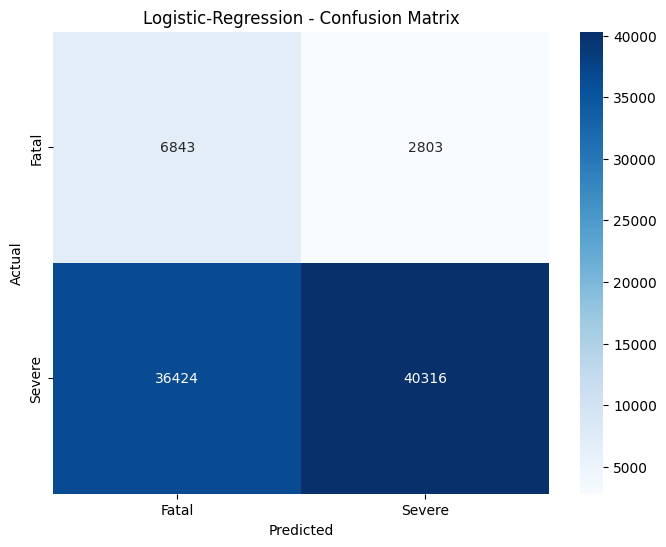

In [178]:
evaluate_model(y_test,y_pred,'Logistic-Regression')# Evaluate the model


In [179]:
#Hyper Parameter Tuning on the same dataset using GridSearch CV
param_grid = {
    'C': [1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 500,1000],
    'class_weight': ['balanced', None]
}

In [180]:
lr_hp = LogisticRegression()

In [181]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=lr_hp,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [182]:
grid_search.fit(X_train_balanced,y_train_balanced)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'class_weight': ['balanced', None],
                         'max_iter': [200, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [183]:
y_pred=grid_search.predict(X_test)

Logistic Regression With Hyper Parameter Tunning - Classification Report:
              precision    recall  f1-score   support

       Fatal       0.16      0.71      0.26      9646
      Severe       0.93      0.53      0.67     76740

    accuracy                           0.55     86386
   macro avg       0.55      0.62      0.47     86386
weighted avg       0.85      0.55      0.63     86386

Logistic Regression With Hyper Parameter Tunning - Accuracy Score: 0.5457250017363925


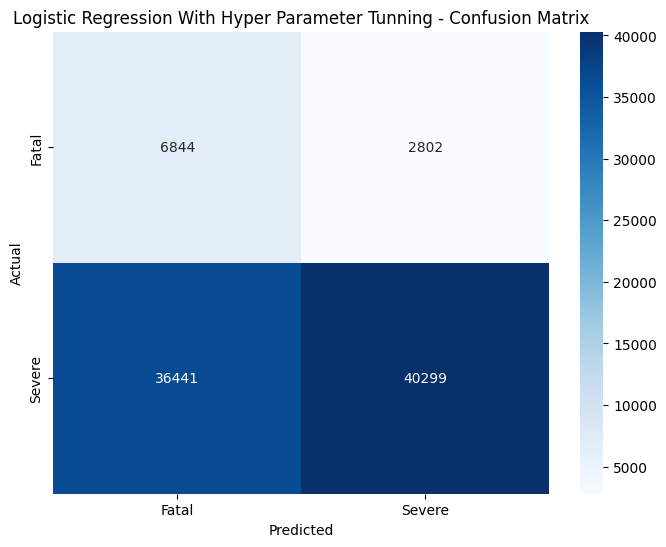

In [184]:
evaluate_model(y_test,y_pred,'Logistic Regression With Hyper Parameter Tunning')

Multinomial Naive Bayes:

In order to perform Multinomial Naive Bayes , we use the dataset which was used before , the change is well to  categorize the severity alone to two classes as severe and fatal and then use the description column as a independent variable to predict the target severity.  

In [188]:
X_MNB_balanced.shape

(15600, 5000)

In [189]:
y_MNB_balanced.shape

(15600,)

In [197]:
y_MNB_balanced

,Severity
21762,1
205425,1
16080,1
231304,1
216281,1
16380,1
222113,1
206055,1
238282,1
...,...


In [191]:
y_MNB_balanced.value_counts()

,count
Severity,
1,3900
2,3900
3,3900
4,3900


In [205]:
p = y_MNB_balanced.apply(lambda x:'Severe' if x in [1,2] else 'Fatal')

In [206]:
p

,Severity
21762,Severe
205425,Severe
16080,Severe
231304,Severe
216281,Severe
16380,Severe
222113,Severe
206055,Severe
238282,Severe
...,...


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X_MNB_balanced, p, test_size=0.3, random_state=42)

In [209]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [210]:
y_train

,Severity
206904,Severe
277234,Fatal
214698,Severe
72759,Severe
24433,Severe
14526,Fatal
4506,Fatal
31283,Fatal
252649,Fatal
...,...


In [211]:
#  Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [212]:
y_pred_mnb = mnb.predict(X_test)

Multinomial Naive Bayes  - Classification Report:
              precision    recall  f1-score   support

       Fatal       0.83      0.91      0.87      2330
      Severe       0.90      0.81      0.86      2350

    accuracy                           0.86      4680
   macro avg       0.87      0.86      0.86      4680
weighted avg       0.87      0.86      0.86      4680

Multinomial Naive Bayes  - Accuracy Score: 0.8630341880341881


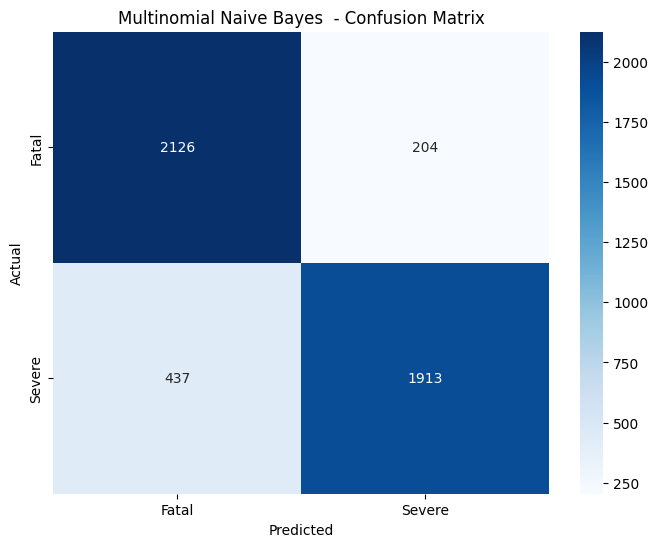

In [213]:
evaluate_model(y_test,y_pred_mnb,"Multinomial Naive Bayes ")